# **Project Name - Shopper Spectrum**



##### **Project Type**    - EDA & Classificiation
##### **Team Member 1 - Aswin K J**

# **Project Summary -**

This Project develops and trains machine learning models for e-commerce customer segmentation and product recommendation. Using RFM (Recency, Frequency, Monetary) analysis and clustering techniques, the notebook prepares data, trains models, and saves them for integration into a Streamlit web application.

# **GitHub Link -**

Provide your GitHub Link here.



# **Problem Statement**


The global e-commerce industry generates vast amounts of transaction data daily, offering valuable insights into customer purchasing behaviors. Analyzing this data is essential for identifying meaningful customer segments and recommending relevant products to enhance customer experience and drive business growth. This project aims to examine transaction data from an online retail business to uncover patterns in customer purchase behavior, segment customers based on Recency, Frequency, and Monetary (RFM) analysis, and develop a product recommendation system using collaborative filtering techniques.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [34]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.spatial.distance import cdist
import plotly.express as px
import plotly.graph_objects as go
from sklearn.metrics.pairwise import cosine_similarity
from datetime import timedelta
import joblib


### Dataset Loading

In [3]:
# Load Dataset
df = pd.read_csv("online_retail.csv")   # replace with actual dataset path


### Dataset First View

In [4]:
# Dataset First Look
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2022-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2022-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2022-12-01 08:26:00,3.39,17850.0,United Kingdom


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
df.shape

(541909, 8)

### Dataset Information

In [6]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
df.duplicated().sum()

np.int64(5268)

#### Missing Values/Null Values

In [8]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,1454
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,135080
Country,0


<Axes: >

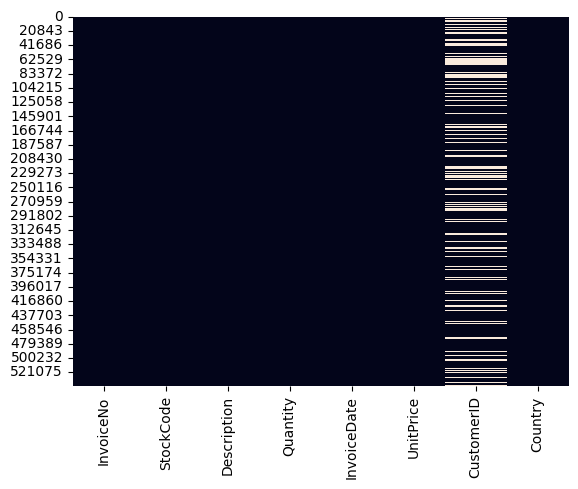

In [9]:
# Visualizing the missing values
sns.heatmap(df.isnull(), cbar=False)

### What did you know about your dataset?

The following dataset contains purchase details of products along with the customer id of the customers.

It contains exactly these colums
- Invoice Number
- Stock code
- Description of the Product
- Quantity
- Invoice Date
- Unit Price
- Customer ID
- Country

There were exactly 5,41,909 rows and 8 columns which are mentioned above and around 5268 duplicate values and 1454 & 1,35,080 missing values in Description and Customer ID respectively.

## ***2. Understanding Your Variables***

In [10]:
# Dataset Columns
df.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [11]:
# Dataset Describe
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


### Variables Description

| **Variable**    | **Description**                                                                                           |
| --------------- | --------------------------------------------------------------------------------------------------------- |
| **InvoiceNo**   | Unique invoice number identifying each transaction. If it starts with "C", the transaction was cancelled. |
| **StockCode**   | Unique product/item code assigned to each product in the catalog.                                         |
| **Description** | Text description of the product.                                                                          |
| **Quantity**    | Number of units of the product purchased per transaction.                                                 |
| **InvoiceDate** | Date and time when the transaction was generated.                                                         |
| **UnitPrice**   | Price of a single unit of the product (in local currency).                                                |
| **CustomerID**  | Unique identifier assigned to each customer.                                                              |
| **Country**     | Name of the country where the customer resides.                                                           |


### Check Unique Values for each variable.

In [12]:
# Check Unique Values for each variable.
df.nunique().sort_values(ascending=False)

,0
InvoiceNo,25900
InvoiceDate,23260
CustomerID,4372
Description,4223
StockCode,4070
UnitPrice,1630
Quantity,722
Country,38


## 3. ***Data Wrangling***

### Data Wrangling Code

In [35]:
# Dataset size before wrangling
print(f"Original dataset size: {len(df)} \n")

# Remove rows with missing CustomerID
df_clean = df.dropna(subset=['CustomerID']).copy()
print(f"After removing missing CustomerID: {len(df_clean)}")

# Convert CustomerID to integer
df_clean['CustomerID'] = df_clean['CustomerID'].astype(int)

# Remove cancelled invoices (InvoiceNo starting with 'C')
df_clean = df_clean[~df_clean['InvoiceNo'].str.startswith('C', na=False)]
print(f"After removing cancelled invoices: {len(df_clean)}")

# Remove negative or zero quantities and prices
df_clean = df_clean[(df_clean['Quantity'] > 0) & (df_clean['UnitPrice'] > 0)]
print(f"After removing negative/zero quantities and prices: {len(df_clean)}")

# Convert InvoiceDate to datetime
df_clean['InvoiceDate'] = pd.to_datetime(df_clean['InvoiceDate'])

# Create TotalAmount column
df_clean['TotalAmount'] = df_clean['Quantity'] * df_clean['UnitPrice']

print(f"\nFinal cleaned dataset size: {len(df_clean)}")
print(f"\n Length Difference : {len(df)-len(df_clean)}")

Original dataset size: 541909 

After removing missing CustomerID: 406829
After removing cancelled invoices: 397924
After removing negative/zero quantities and prices: 397884

Final cleaned dataset size: 397884

 Length Difference : 144025


### What all manipulations have you done and insights you found?

The following manipulations have been done:


1.   Removed rows without Customer ID because they are useless for the data analysis
2.   Make Customer ID datatype to integer to make it easier for analysis,grouping etc.
3.   Remove cancelled invoices because for RFM and recommendations we need successful orders alone
4.   Removed negative or zero quantity prices because those values should be positive and if not removed they might mess with the graphs and analysis.
5.   Convert the Invoice date's datatype into datetime so that it can be used for RFM Analysis.
6.   Created a Total Amount Column by multiplying the unit price with quantity.

The final length and initial length are printed to show the difference in length after the manipulations.



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1 - Transaction Volume by Country

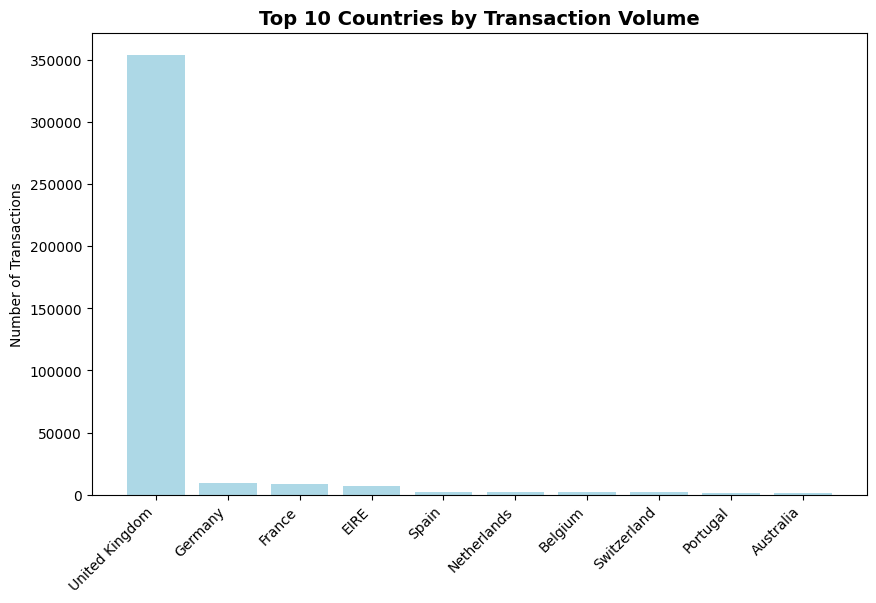

In [21]:
import matplotlib.pyplot as plt

# Set up a single plot
plt.figure(figsize=(10,6))
plt.title('Top 10 Countries by Transaction Volume', fontsize=14, fontweight='bold')

# Transaction volume by country
country_counts = df_clean['Country'].value_counts().head(10)
plt.bar(country_counts.index, country_counts.values, color='lightblue')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of Transactions')
plt.show()


##### 1. Why did you pick the specific chart?

I chose to plot the Countries by Number of Transactions because then i'd know where my main audience are and where else to focus on. I chose barplot because its the easiest and common way to visualize two set of values.

##### 2. What is/are the insight(s) found from the chart?

I found out that -

1. UK is the place where the most people are purchasing from this platform so UK is our strong area and we have a good hold there.
2. The rest of the countries seem to be very very low so expecting that this is a UK based company it should also work on setting up local marketing campaigns and other stuffs in the rest of the world.

##### 3. Will the gained insights help creating a positive business impact?

This graph will help the company to be present worldwide and know which places are their best performers and where they should work hard and do more marketing to gain more profit around the world.

#### Chart - 2 - Top Selling Products

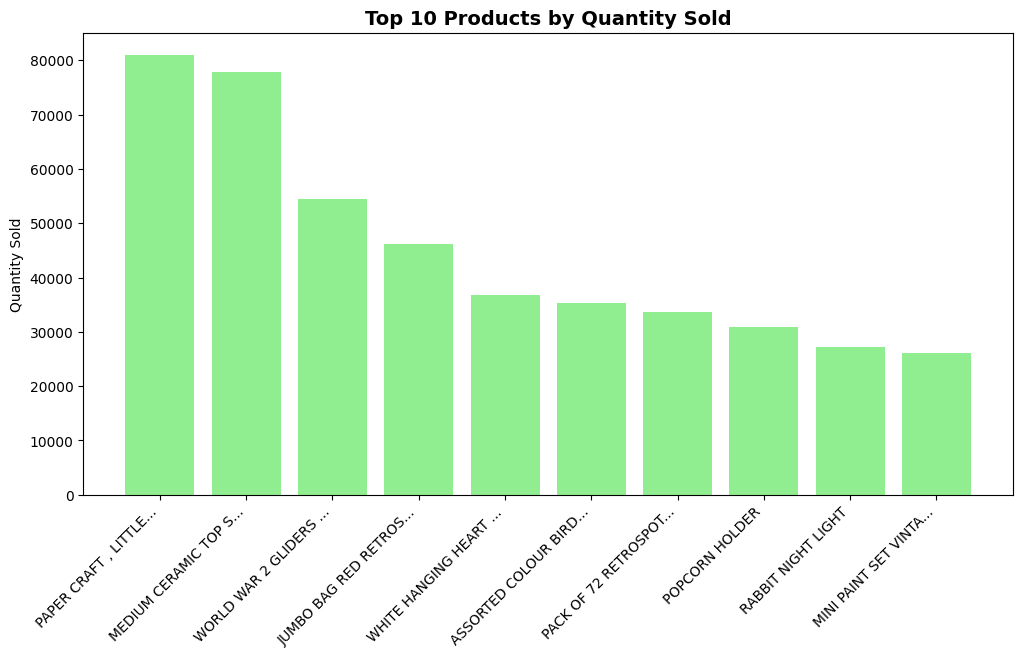

In [26]:
import matplotlib.pyplot as plt

# Calculate top 10 products
top_products = df_clean.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

# Create single bar chart
plt.figure(figsize=(12,6))
plt.bar(top_products.index, top_products.values, color='lightgreen')
plt.title('Top 10 Products by Quantity Sold', fontsize=14, fontweight='bold')
plt.xticks(rotation=45, ha='right')

# Shorten long labels for readability
labels = [desc[:20] + '...' if len(desc) > 20 else desc for desc in top_products.index]
plt.xticks(range(len(top_products)), labels, rotation=45, ha='right')

plt.ylabel('Quantity Sold')
plt.show()


##### 1. Why did you pick the specific chart?

A bar chart is ideal to clearly compare sales quantities across the top 10 products and knowing the sales will let us know which product is the best selling

##### 2. What is/are the insight(s) found from the chart?

It highlights which products are most popular like the Paper Craft which is the most trending followed bt Medium Ceramic Top and others.

##### 3. Will the gained insights help creating a positive business impact?

Yes, focusing on these top products can improve inventory planning, targeted promotions, and overall revenue growth.

#### Chart - 3 - Monthly Sales Trend

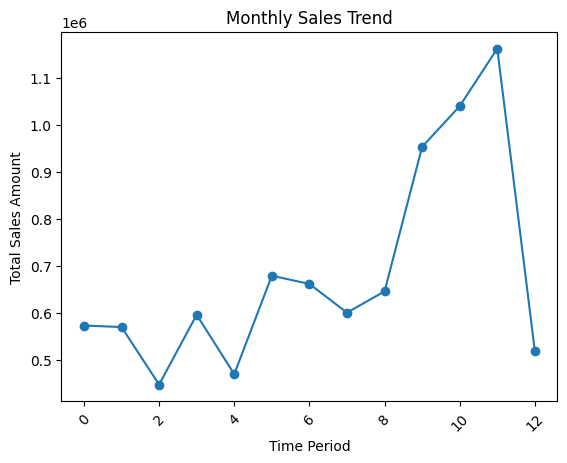

In [27]:
# 3. Purchase trends over time
df_clean['YearMonth'] = df_clean['InvoiceDate'].dt.to_period('M')
monthly_sales = df_clean.groupby('YearMonth')['TotalAmount'].sum()
plt.plot(range(len(monthly_sales)), monthly_sales.values, marker='o')
plt.title('Monthly Sales Trend')
plt.xlabel('Time Period')
plt.ylabel('Total Sales Amount')
plt.gca().tick_params(axis='x', rotation=45)


##### 1. Why did you pick the specific chart?

A line chart is best for showing how sales evolve over time, making trends and patterns easy to spot. Here knowing this will help us identify the monthly sales trend and know which month was the best so far.

##### 2. What is/are the insight(s) found from the chart?

The plot reveals fluctuations in monthly sales, highlighting peaks and declines that indicate seasonal demand or promotional impacts. The sale was highest in the 11th month as you can see and then dropped hard on 12th month maybe analyzing what happened will give us a better clue on what not to do.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, recognizing sales trends enables better forecasting, inventory management, and timing of marketing campaigns to maximize revenue. The drop of sales from 11th to 12th month if analyzed thoroughly can give insights that may lead to negative growth

#### Chart - 4 - Monetary Distribution per Customer

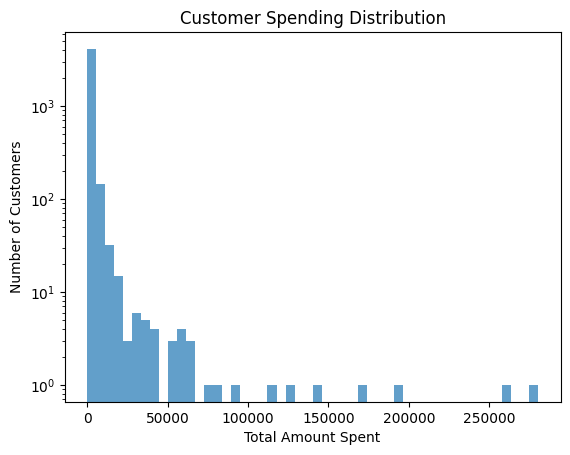

In [29]:
# 4. Monetary distribution per customer
customer_spending = df_clean.groupby('CustomerID')['TotalAmount'].sum()
plt.hist(customer_spending, bins=50, alpha=0.7)
plt.title('Customer Spending Distribution')
plt.xlabel('Total Amount Spent')
plt.ylabel('Number of Customers')
plt.yscale('log')

##### 1. Why did you pick the specific chart?

A histogram can be effectively used to show how customer spending is distributed, revealing overall purchase behavior.

##### 2. What is/are the insight(s) found from the chart?

Most customers here spend relatively small amounts, while a small group contributes disproportionately high revenue.

##### 3. Will the gained insights help creating a positive business impact?


Yes, identifying high‑spending customers helps focus loyalty programs, while strategies can be designed to increase spending among low‑value customers.

#***5. Feature Engineering & Prediction Models***

#### 1. RFM Analysis

Snapshot date for recency calculation: 2023-12-10 12:50:00
RFM Data Sample:
   CustomerID  Recency  Frequency  Monetary
0       12346      326          1  77183.60
1       12347        2          7   4310.00
2       12348       75          4   1797.24
3       12349       19          1   1757.55
4       12350      310          1    334.40

RFM Statistics:
         CustomerID      Recency    Frequency       Monetary
count   4338.000000  4338.000000  4338.000000    4338.000000
mean   15300.408022    92.536422     4.272015    2054.266460
std     1721.808492   100.014169     7.697998    8989.230441
min    12346.000000     1.000000     1.000000       3.750000
25%    13813.250000    18.000000     1.000000     307.415000
50%    15299.500000    51.000000     2.000000     674.485000
75%    16778.750000   142.000000     5.000000    1661.740000
max    18287.000000   374.000000   209.000000  280206.020000


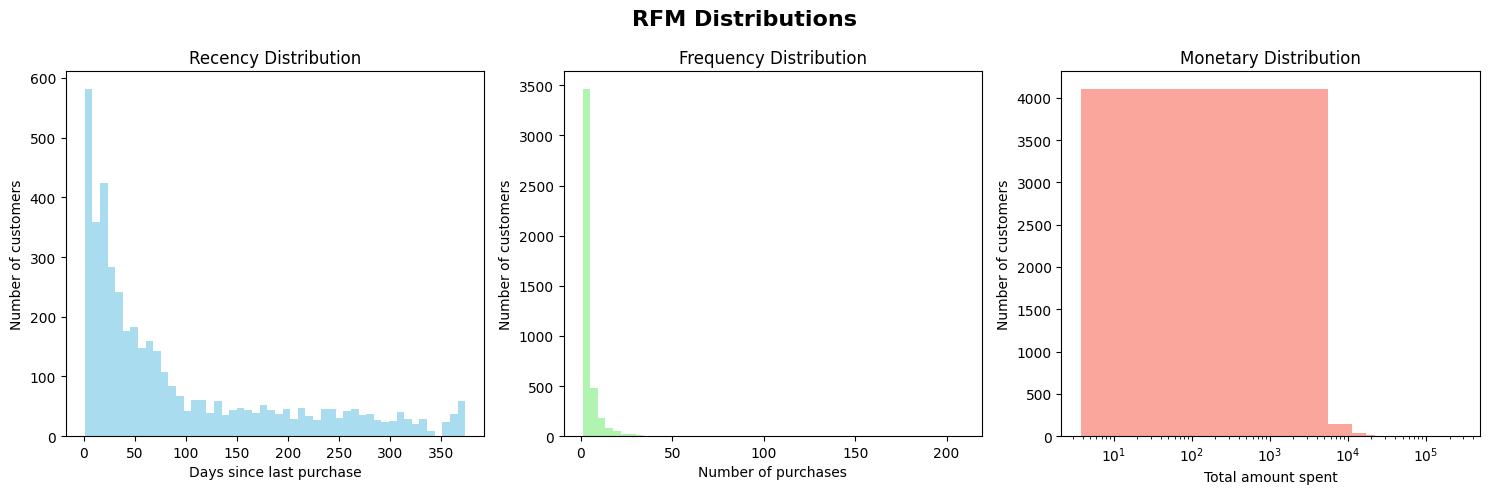

In [36]:
# Calculate RFM metrics
snapshot_date = df_clean['InvoiceDate'].max() + timedelta(days=1)
print(f"Snapshot date for recency calculation: {snapshot_date}")

# Aggregate data by customer
rfm_data = df_clean.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',  # Frequency
    'TotalAmount': 'sum'  # Monetary
}).reset_index()

rfm_data.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

print("RFM Data Sample:")
print(rfm_data.head())

print("\nRFM Statistics:")
print(rfm_data.describe())

# Visualize RFM distributions
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
fig.suptitle('RFM Distributions', fontsize=16, fontweight='bold')

axes[0].hist(rfm_data['Recency'], bins=50, alpha=0.7, color='skyblue')
axes[0].set_title('Recency Distribution')
axes[0].set_xlabel('Days since last purchase')
axes[0].set_ylabel('Number of customers')

axes[1].hist(rfm_data['Frequency'], bins=50, alpha=0.7, color='lightgreen')
axes[1].set_title('Frequency Distribution')
axes[1].set_xlabel('Number of purchases')
axes[1].set_ylabel('Number of customers')

axes[2].hist(rfm_data['Monetary'], bins=50, alpha=0.7, color='salmon')
axes[2].set_title('Monetary Distribution')
axes[2].set_xlabel('Total amount spent')
axes[2].set_ylabel('Number of customers')
axes[2].set_xscale('log')

plt.tight_layout()
plt.show()

Here I have calculated RFM (Recency, Frequency, Monetary) metrics for each customer and then set a snapshot date (one day after the latest purchase) to measure recency, then aggregate transactions by customer:

Recency = days since the last purchase,

Frequency = number of unique invoices,

Monetary = total amount spent.

Finally, I have displayed a summary statistics and plotted histograms to visualize the distributions of these metrics, which help identify customer purchasing behaviors.

#### 2. Customer Segmentation

✅ Features standardized for clustering
Finding optimal number of clusters...


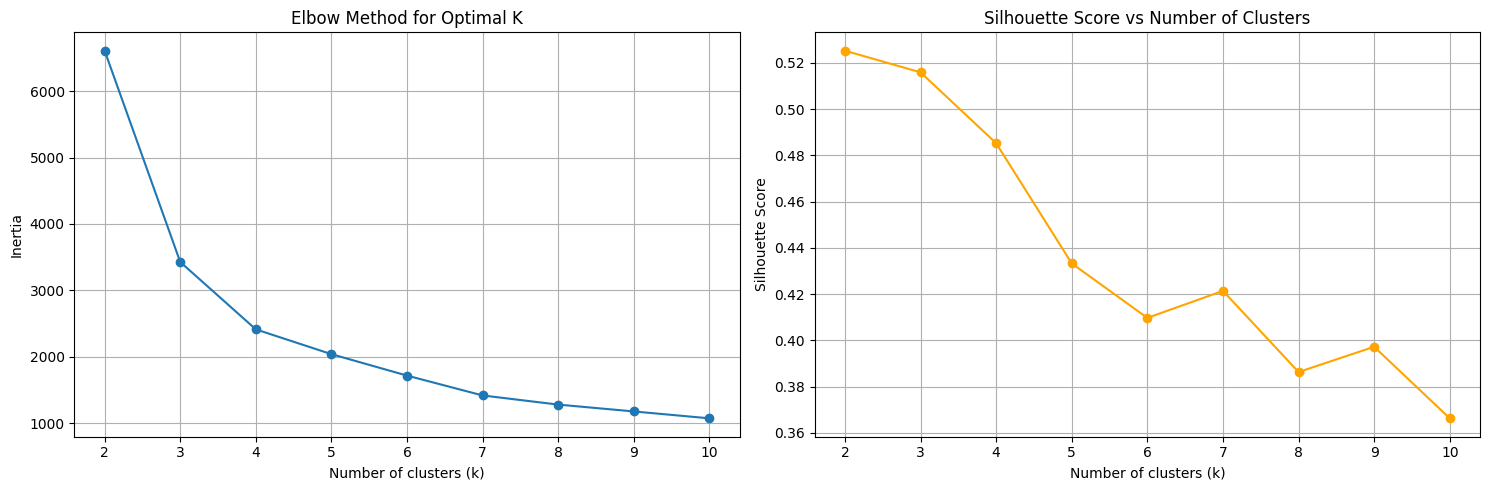

Optimal number of clusters: 2
Silhouette Score for 2 clusters: 0.525

Cluster Characteristics:
            Recency  Frequency     Monetary
Cluster                                    
0         24.118938  12.506928  7450.113037
1        109.601382   2.218030   708.413022

Cluster Labels:
        Segment_Label
Cluster              
0          High-Value
1             At-Risk


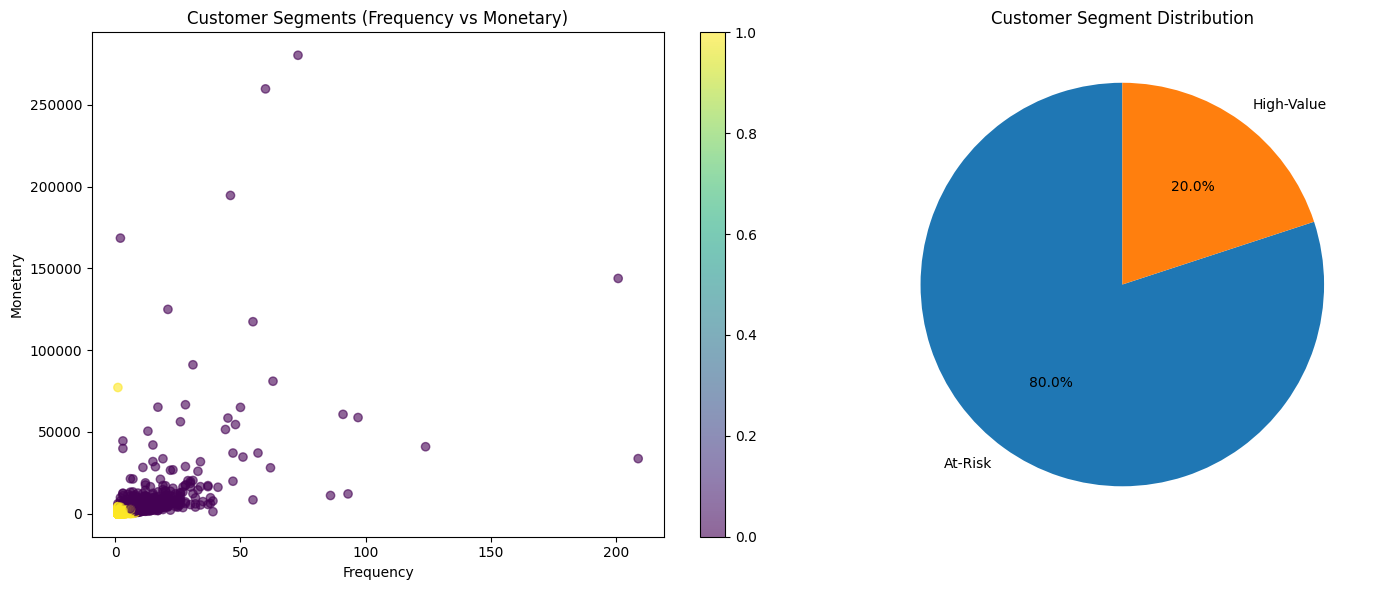


📊 Customer Segment Analysis:
• At-Risk: 3472 customers (80.0%)
• High-Value: 866 customers (20.0%)


In [41]:
# Prepare data for clustering
rfm_features = rfm_data[['Recency', 'Frequency', 'Monetary']].copy()

# Handle outliers by capping at 95th percentile
for col in rfm_features.columns:
    cap_value = rfm_features[col].quantile(0.95)
    rfm_features[col] = rfm_features[col].clip(upper=cap_value)

# Standardize the features
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_features)

print("✅ Features standardized for clustering")

# Determine optimal number of clusters using Elbow Method
inertias = []
silhouette_scores = []
k_range = range(2, 11)

print("Finding optimal number of clusters...")
for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(rfm_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(rfm_scaled, kmeans.labels_))

# Plot Elbow curve and Silhouette scores
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(k_range, inertias, marker='o')
axes[0].set_title('Elbow Method for Optimal K')
axes[0].set_xlabel('Number of clusters (k)')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

axes[1].plot(k_range, silhouette_scores, marker='o', color='orange')
axes[1].set_title('Silhouette Score vs Number of Clusters')
axes[1].set_xlabel('Number of clusters (k)')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

plt.tight_layout()
plt.show()

# Choose optimal k (you can adjust this based on the plots)
optimal_k = k_range[np.argmax(silhouette_scores)]
print(f"Optimal number of clusters: {optimal_k}")

# Perform final clustering
final_kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = final_kmeans.fit_predict(rfm_scaled)

# Add cluster labels to original data
rfm_data['Cluster'] = cluster_labels

print(f"Silhouette Score for {optimal_k} clusters: {silhouette_score(rfm_scaled, cluster_labels):.3f}")

# Analyze cluster characteristics
cluster_summary = rfm_data.groupby('Cluster')[['Recency', 'Frequency', 'Monetary']].mean()
print("\nCluster Characteristics:")
print(cluster_summary)

# Assign meaningful labels to clusters
def assign_cluster_labels(row):
    if row['Frequency'] >= cluster_summary['Frequency'].quantile(0.75) and row['Monetary'] >= cluster_summary['Monetary'].quantile(0.75):
        return 'High-Value'
    elif row['Frequency'] >= cluster_summary['Frequency'].median() and row['Monetary'] >= cluster_summary['Monetary'].median():
        return 'Regular'
    elif row['Recency'] >= cluster_summary['Recency'].quantile(0.75):
        return 'At-Risk'
    else:
        return 'Occasional'

cluster_summary['Segment_Label'] = cluster_summary.apply(assign_cluster_labels, axis=1)
print("\nCluster Labels:")
print(cluster_summary[['Segment_Label']])

# Create a mapping dictionary for labels
cluster_label_map = cluster_summary['Segment_Label'].to_dict()
rfm_data['Segment_Label'] = rfm_data['Cluster'].map(cluster_label_map)

# Visualize clusters
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# 3D scatter plot (using 2D projection)
scatter = axes[0].scatter(rfm_data['Frequency'], rfm_data['Monetary'],
                         c=rfm_data['Cluster'], cmap='viridis', alpha=0.6)
axes[0].set_xlabel('Frequency')
axes[0].set_ylabel('Monetary')
axes[0].set_title('Customer Segments (Frequency vs Monetary)')
plt.colorbar(scatter, ax=axes[0])

# Cluster distribution
segment_counts = rfm_data['Segment_Label'].value_counts()
axes[1].pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', startangle=90)
axes[1].set_title('Customer Segment Distribution')

plt.tight_layout()
plt.show()

print("\n📊 Customer Segment Analysis:")
for label, count in segment_counts.items():
    percentage = (count / len(rfm_data)) * 100
    print(f"• {label}: {count} customers ({percentage:.1f}%)")

Here I have prepared the RFM data for clustering by handling outliers, standardizing features, and appleid the **Elbow Method** and **Silhouette Score** to determine the optimal number of clusters. Using KMeans, customers are segmented into groups with labels such as **High-Value, Regular, Occasional, and At-Risk** based on their purchasing behavior. Finally, we visualize the clusters with scatter plots and pie charts, and analyze the proportion of customers in each segment to better understand customer profiles.


#### 3. Product Recommendation System

In [42]:
# Create customer-product matrix for collaborative filtering
print("Creating customer-product matrix...")

# Use StockCode and Description for product identification
product_matrix = df_clean.groupby(['CustomerID', 'StockCode'])['Quantity'].sum().unstack(fill_value=0)

print(f"Customer-Product matrix shape: {product_matrix.shape}")

# Calculate product similarity using cosine similarity
print("Calculating product similarities...")
product_similarity = cosine_similarity(product_matrix.T)

# Create product similarity dataframe
product_similarity_df = pd.DataFrame(product_similarity,
                                   index=product_matrix.columns,
                                   columns=product_matrix.columns)

print("✅ Product similarity matrix created!")

# Create product name mapping
product_mapping = df_clean[['StockCode', 'Description']].drop_duplicates().set_index('StockCode')['Description'].to_dict()

def get_product_recommendations(product_code, n_recommendations=5):
    """Get product recommendations based on similarity"""
    if product_code not in product_similarity_df.index:
        return []

    # Get similarity scores for the product
    sim_scores = product_similarity_df[product_code].sort_values(ascending=False)

    # Get top N similar products (excluding the product itself)
    similar_products = sim_scores.iloc[1:n_recommendations+1].index.tolist()

    # Return product codes and names
    recommendations = []
    for code in similar_products:
        name = product_mapping.get(code, 'Unknown Product')
        score = sim_scores[code]
        recommendations.append({'StockCode': code, 'Description': name, 'Similarity': score})

    return recommendations

# Test the recommendation system
sample_product = product_matrix.columns[0]
sample_recommendations = get_product_recommendations(sample_product)
print(f"\nSample recommendations for product {sample_product}:")
for i, rec in enumerate(sample_recommendations, 1):
    print(f"{i}. {rec['Description']} (Similarity: {rec['Similarity']:.3f})")

Creating customer-product matrix...
Customer-Product matrix shape: (4338, 3665)
Calculating product similarities...
✅ Product similarity matrix created!

Sample recommendations for product 10002:
1. MINI FUNKY DESIGN TAPES (Similarity: 0.854)
2. CHERUB HEART DECORATION GOLD (Similarity: 0.713)
3. CHRISTMAS TREE HANGING GOLD (Similarity: 0.699)
4. BLACK/BLUE POLKADOT UMBRELLA (Similarity: 0.626)
5. RED RETROSPOT CHILDRENS UMBRELLA (Similarity: 0.597)


In this code, I have prepared the RFM data for clustering by handling outliers, standardizing features, and applying the Elbow Method and Silhouette Score to determine the optimal number of clusters. Using KMeans, customers are segmented into groups with labels such as High-Value, Regular, Occasional, and At-Risk based on their purchasing behavior. Finally, we visualize the clusters with scatter plots and pie charts, and analyze the proportion of customers in each segment to better understand customer profiles.

## ***5. Hypothesis Testing***

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Null Hypothesis (H₀): There is no significant difference in average spending between UK customers and non‑UK customers.

Alternate Hypothesis (H₁): UK customers spend significantly more than non‑UK customers.

#### 2. Perform an appropriate statistical test.

In [31]:
from scipy.stats import ttest_ind

uk_spending = df_clean[df_clean['Country']=='United Kingdom'].groupby('CustomerID')['TotalAmount'].sum()
nonuk_spending = df_clean[df_clean['Country']!='United Kingdom'].groupby('CustomerID')['TotalAmount'].sum()

t_stat, p_val = ttest_ind(uk_spending, nonuk_spending, equal_var=False)
print("t-statistic:", t_stat, "p-value:", p_val)

if p_val < 0.05:
    print("Reject the null hypothesis")
else:
    print("Fail to reject the null hypothesis")

t-statistic: -2.2640696054181957 p-value: 0.024063566370922964
Reject the null hypothesis


##### Which statistical test have you done to obtain P-Value?

Two Sample T Test


##### Why did you choose the specific statistical test?

Its the most efficient test for just testing two values and obtaining a result.

## ***8.*** ***Future Work (Optional)***

### 1. Saving models and data for Streamlit Deployment


In [43]:
# Save the clustering model and scaler
joblib.dump(final_kmeans, 'customer_segmentation_model.pkl')
joblib.dump(scaler, 'rfm_scaler.pkl')

# Save cluster label mapping
joblib.dump(cluster_label_map, 'cluster_labels.pkl')

# Save product similarity matrix and mappings
joblib.dump(product_similarity_df, 'product_similarity_matrix.pkl')
joblib.dump(product_mapping, 'product_mapping.pkl')

# Save a sample of the data for the app
rfm_sample = rfm_data.sample(min(1000, len(rfm_data)))
rfm_sample.to_csv('rfm_sample_data.csv', index=False)

print("✅ All models and data saved successfully!")

print("\n📋 Model Performance Summary:")
print("-" * 40)
print(f"• Number of customers analyzed: {len(rfm_data):,}")
print(f"• Number of products in similarity matrix: {len(product_similarity_df):,}")
print(f"• Clustering silhouette score: {silhouette_score(rfm_scaled, cluster_labels):.3f}")
print(f"• Customer segments identified: {len(segment_counts)}")

print("\n🎯 Customer Segments:")
for label, count in segment_counts.items():
    percentage = (count / len(rfm_data)) * 100
    avg_values = rfm_data[rfm_data['Segment_Label'] == label][['Recency', 'Frequency', 'Monetary']].mean()
    print(f"• {label}: {count} customers ({percentage:.1f}%)")
    print(f"  - Avg Recency: {avg_values['Recency']:.1f} days")
    print(f"  - Avg Frequency: {avg_values['Frequency']:.1f} purchases")
    print(f"  - Avg Monetary: ${avg_values['Monetary']:.2f}")

print("\n🚀 Ready for Streamlit deployment!")
print("Files created:")
print("• customer_segmentation_model.pkl")
print("• rfm_scaler.pkl")
print("• cluster_labels.pkl")
print("• product_similarity_matrix.pkl")
print("• product_mapping.pkl")
print("• rfm_sample_data.csv")

✅ All models and data saved successfully!

📋 Model Performance Summary:
----------------------------------------
• Number of customers analyzed: 4,338
• Number of products in similarity matrix: 3,665
• Clustering silhouette score: 0.525
• Customer segments identified: 2

🎯 Customer Segments:
• At-Risk: 3472 customers (80.0%)
  - Avg Recency: 109.6 days
  - Avg Frequency: 2.2 purchases
  - Avg Monetary: $708.41
• High-Value: 866 customers (20.0%)
  - Avg Recency: 24.1 days
  - Avg Frequency: 12.5 purchases
  - Avg Monetary: $7450.11

🚀 Ready for Streamlit deployment!
Files created:
• customer_segmentation_model.pkl
• rfm_scaler.pkl
• cluster_labels.pkl
• product_similarity_matrix.pkl
• product_mapping.pkl
• rfm_sample_data.csv


### 2. Streamlit Deployment Code

In [ ]:
'''
import streamlit as st
import pandas as pd
import numpy as np
import joblib
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# Page configuration
st.set_page_config(
    page_title="Shopper Spectrum",
    page_icon="🛒",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Custom CSS for better styling
st.markdown("""
<style>
    .main-header {
        font-size: 2.5rem;
        color: #1f77b4;
        text-align: center;
        margin-bottom: 2rem;
        font-weight: bold;
    }
    .subheader {
        font-size: 1.5rem;
        color: #ff7f0e;
        margin-bottom: 1rem;
        font-weight: bold;
    }
    .metric-card {
        background-color: #f0f2f6;
        padding: 1rem;
        border-radius: 0.5rem;
        border-left: 5px solid #1f77b4;
        margin: 0.5rem 0;
        color: #222 !important;
    }
    .recommendation-card {
        background-color: #e8f4fd;
        padding: 1rem;
        border-radius: 0.5rem;
        margin: 0.5rem 0;
        border-left: 4px solid #2e86ab;
        color: #222 !important;
    }
    .segment-card {
        padding: 1rem;
        border-radius: 0.5rem;
        margin: 0.5rem 0;
        border-left: 4px solid #28a745;
        color: #222 !important;
    }
    .high-value { background-color: #d4edda; border-left-color: #28a745; color: #222 !important; }
    .regular { background-color: #fff3cd; border-left-color: #ffc107; color: #222 !important; }
    .occasional { background-color: #f8d7da; border-left-color: #dc3545; color: #222 !important; }
    .at-risk { background-color: #d1ecf1; border-left-color: #17a2b8; color: #222 !important; }
</style>
""", unsafe_allow_html=True)

# Load models and data
@st.cache_data
def load_models_and_data():
    try:
        # Load models
        clustering_model = joblib.load('customer_segmentation_model.pkl')
        scaler = joblib.load('rfm_scaler.pkl')
        cluster_labels = joblib.load('cluster_labels.pkl')

        # Load recommendation system components
        product_similarity_df = joblib.load('product_similarity_matrix.pkl')
        product_mapping = joblib.load('product_mapping.pkl')

        # Load sample data for visualization
        rfm_sample = pd.read_csv('rfm_sample_data.csv')

        return clustering_model, scaler, cluster_labels, product_similarity_df, product_mapping, rfm_sample
    except FileNotFoundError as e:
        st.error(f"Model files not found: {e}")
        st.error("Please run the Jupyter notebook first to generate the required model files.")
        return None, None, None, None, None, None

# Load all components
clustering_model, scaler, cluster_labels, product_similarity_df, product_mapping, rfm_sample = load_models_and_data()

# Main app header
st.markdown('<h1 class="main-header">🛒 Shopper Spectrum</h1>', unsafe_allow_html=True)
st.markdown('<p style="text-align: center; color: #666; font-size: 1.2rem;">Customer Segmentation & Product Recommendations in E-Commerce</p>', unsafe_allow_html=True)

# Check if models are loaded
if clustering_model is None:
    st.stop()

# Sidebar navigation
st.sidebar.title("🧭 Navigation")
app_mode = st.sidebar.selectbox(
    "Choose App Mode",
    ["🏠 Home", "🎯 Product Recommendations", "👥 Customer Segmentation", "📊 Analytics Dashboard"]
)

# Home Page
if app_mode == "🏠 Home":
    st.markdown('<h2 class="subheader">Welcome to Shopper Spectrum!</h2>', unsafe_allow_html=True)

    col1, col2 = st.columns(2)

    with col1:
        st.markdown("""
        ### 🎯 What is Shopper Spectrum?

        Shopper Spectrum is an advanced e-commerce analytics platform that helps businesses:

        - **🔍 Understand Customer Behavior** through RFM analysis
        - **👥 Segment Customers** into meaningful groups
        - **🛍️ Recommend Products** using collaborative filtering
        - **📈 Drive Business Growth** through data-driven insights
        """)

    with col2:
        st.markdown("""
        ### 🚀 Key Features

        - **Product Recommendation Engine**: Get 5 similar products for any item
        - **Customer Segmentation**: Classify customers into High-Value, Regular, Occasional, or At-Risk
        - **Real-time Predictions**: Instant results using machine learning models
        - **Interactive Analytics**: Visualize customer patterns and trends
        """)

    st.markdown("---")

    # Display some key metrics
    if rfm_sample is not None:
        st.markdown('<h3 class="subheader">📊 Dataset Overview</h3>', unsafe_allow_html=True)

        col1, col2, col3, col4 = st.columns(4)

        with col1:
            st.markdown(f"""
            <div class="metric-card">
                <h4 style="color: #1f77b4; margin: 0;">Total Customers</h4>
            <h2 style="margin: 0; color: #222;">{len(rfm_sample):,}</h2>
            </div>
            """, unsafe_allow_html=True)

        with col2:
            avg_frequency = rfm_sample['Frequency'].mean()
            st.markdown(f"""
            <div class="metric-card">
                <h4 style="color: #ff7f0e; margin: 0;">Avg Frequency</h4>
            <h2 style="margin: 0; color: #222;">{avg_frequency:.1f}</h2>
            </div>
            """, unsafe_allow_html=True)

        with col3:
            avg_monetary = rfm_sample['Monetary'].mean()
            st.markdown(f"""
            <div class="metric-card">
                <h4 style="color: #2ca02c; margin: 0;">Avg Spending</h4>
            <h2 style="margin: 0; color: #222;">${avg_monetary:.0f}</h2>
            </div>
            """, unsafe_allow_html=True)

        with col4:
            total_products = len(product_mapping)
            st.markdown(f"""
            <div class="metric-card">
                <h4 style="color: #d62728; margin: 0;">Total Products</h4>
            <h2 style="margin: 0; color: #222;">{total_products:,}</h2>
            </div>
            """, unsafe_allow_html=True)

# Product Recommendations Page
elif app_mode == "🎯 Product Recommendations":
    st.markdown('<h2 class="subheader">🎯 Product Recommendation Engine</h2>', unsafe_allow_html=True)

    st.markdown("""
    ### How it works:
    Our recommendation system uses **collaborative filtering** to find products that are frequently bought together by similar customers.
    Simply enter a product name or select from the dropdown to get personalized recommendations!
    """)

    # Create product search interface
    col1, col2 = st.columns([2, 1])

    with col1:
        # Product search options
        search_option = st.radio(
            "Choose search method:",
            ["🔍 Search by Product Name", "📋 Select from List"]
        )

        if search_option == "🔍 Search by Product Name":
            # Text input for product search
            product_search = st.text_input(
                "Enter product name:",
                placeholder="e.g., 'LUNCH BAG RED RETROSPOT', 'WHITE METAL LANTERN'"
            )

            # Find matching products
            if product_search:
                matching_products = []
                search_lower = product_search.lower()
                for code, name in product_mapping.items():
                    if search_lower in name.lower():
                        matching_products.append((code, name))

                if matching_products:
                    selected_product = st.selectbox(
                        "Select from matching products:",
                        options=[code for code, name in matching_products],
                        format_func=lambda x: product_mapping[x],
                        key="product_search_select"
                    )
                else:
                    st.warning("No matching products found. Try a different search term.")
                    selected_product = None
            else:
                selected_product = None

        else:
            # Dropdown selection
            product_list = list(product_mapping.keys())[:100]  # Show first 100 products
            selected_product = st.selectbox(
                "Select a product:",
                options=product_list,
                format_func=lambda x: product_mapping[x],
                key="product_dropdown_select"
            )

    with col2:
        st.markdown("""
        ### 💡 Tips:
        - Try searching for common items like 'bag', 'cup', 'light'
        - Product names are case-insensitive
        - Get 5 similar product recommendations
        - Based on customer purchase patterns
        """)

    # Get recommendations button
    if st.button("🚀 Get Recommendations", type="primary"):
        if selected_product and selected_product in product_similarity_df.index:
            # Get recommendations
            sim_scores = product_similarity_df[selected_product].sort_values(ascending=False)
            top_recommendations = sim_scores.iloc[1:6]  # Top 5 similar products

            st.markdown('<h3 class="subheader">🎯 Recommended Products</h3>', unsafe_allow_html=True)

            # Display selected product
            st.markdown(f"""
            <div class="recommendation-card">
                <h4 style="color: #2e86ab; margin: 0;">Selected Product:</h4>
                <h3 style="margin: 0.5rem 0; color: #222;">{product_mapping[selected_product]}</h3>
                <p style="margin: 0; color: #222;">Product Code: {selected_product}</p>
            </div>
            """, unsafe_allow_html=True)

            # Display recommendations
            st.markdown("### 🛍️ Similar Products You Might Like:")

            for i, (product_code, similarity_score) in enumerate(top_recommendations.items(), 1):
                product_name = product_mapping.get(product_code, "Unknown Product")
                similarity_percentage = similarity_score * 100

                # Color code based on similarity score
                if similarity_score > 0.7:
                    border_color = "#28a745"  # Green for high similarity
                elif similarity_score > 0.5:
                    border_color = "#ffc107"  # Yellow for medium similarity
                else:
                    border_color = "#dc3545"  # Red for low similarity

                st.markdown(f"""
                <div style="background-color: #f8f9fa; padding: 1rem; border-radius: 0.5rem;
                           margin: 0.5rem 0; border-left: 4px solid {border_color};">
                    <div style="display: flex; justify-content: space-between; align-items: center;">
                        <div>
                            <h4 style="margin: 0; color: #222;">{i}. {product_name}</h4>
                            <p style="margin: 0.2rem 0; color: #222; font-size: 0.9rem;">Code: {product_code}</p>
                        </div>
                        <div style="text-align: right;">
                            <span style="background-color: {border_color}; color: white; padding: 0.2rem 0.5rem;
                                        border-radius: 0.3rem; font-weight: bold;">
                                {similarity_percentage:.1f}% match
                            </span>
                        </div>
                    </div>
                </div>
                """, unsafe_allow_html=True)

        else:
            st.error("Please select a valid product to get recommendations.")

# Customer Segmentation Page
elif app_mode == "👥 Customer Segmentation":
    st.markdown('<h2 class="subheader">👥 Customer Segmentation Predictor</h2>', unsafe_allow_html=True)

    st.markdown("""
    ### 🧠 RFM Analysis

    Our customer segmentation model uses **RFM Analysis** to classify customers into four distinct segments:
    - **Recency**: How recently did the customer make a purchase?
    - **Frequency**: How often does the customer make purchases?
    - **Monetary**: How much money does the customer spend?
    """)

    # Create input interface
    col1, col2 = st.columns([1, 1])

    with col1:
        st.markdown("### 📊 Enter Customer Metrics")

        # Input fields
        recency = st.number_input(
            "🕒 Recency (days since last purchase)",
            min_value=0,
            max_value=1000,
            value=30,
            help="Number of days since the customer's last purchase"
        )

        frequency = st.number_input(
            "🔄 Frequency (number of purchases)",
            min_value=1,
            max_value=1000,
            value=5,
            help="Total number of purchases made by the customer"
        )

        monetary = st.number_input(
            "💰 Monetary (total amount spent)",
            min_value=0.0,
            max_value=100000.0,
            value=500.0,
            step=10.0,
            help="Total amount of money spent by the customer"
        )

        # Predict button
        predict_button = st.button("🎯 Predict Customer Segment", type="primary")

    with col2:
        st.markdown("### 📖 Segment Definitions")

        st.markdown("""
        <div class="segment-card high-value">
            <h4>🌟 High-Value Customers</h4>
            <p>Recent, frequent buyers with high spending. Your most valuable customers!</p>
        </div>

        <div class="segment-card regular">
            <h4>👤 Regular Customers</h4>
            <p>Steady purchasers with moderate frequency and spending patterns.</p>
        </div>

        <div class="segment-card occasional">
            <h4>🔄 Occasional Customers</h4>
            <p>Infrequent buyers with lower spending amounts. Potential for growth.</p>
        </div>

        <div class="segment-card at-risk">
            <h4>⚠️ At-Risk Customers</h4>
            <p>Haven't purchased recently. Need retention strategies!</p>
        </div>
        """, unsafe_allow_html=True)

    # Prediction logic
    if predict_button:
        # Prepare input data
        input_data = np.array([[recency, frequency, monetary]])

        # Scale the input data
        input_scaled = scaler.transform(input_data)

        # Make prediction
        cluster_prediction = clustering_model.predict(input_scaled)[0]
        segment_label = cluster_labels[cluster_prediction]

        # Display results
        st.markdown("---")
        st.markdown('<h3 class="subheader">🎯 Prediction Results</h3>', unsafe_allow_html=True)

        # Create result display based on segment
        segment_colors = {
            'High-Value': '#28a745',
            'Regular': '#ffc107',
            'Occasional': '#dc3545',
            'At-Risk': '#17a2b8'
        }

        segment_descriptions = {
            'High-Value': {
                'icon': '🌟',
                'title': 'High-Value Customer',
                'description': 'This customer is highly valuable! They make frequent purchases, spend generously, and have purchased recently.',
                'strategies': [
                    '🎁 Offer premium products and exclusive deals',
                    '💎 Provide VIP customer service',
                    '📧 Send personalized recommendations',
                    '🏆 Create loyalty rewards program'
                ]
            },
            'Regular': {
                'icon': '👤',
                'title': 'Regular Customer',
                'description': 'This customer shows consistent purchasing behavior with moderate frequency and spending.',
                'strategies': [
                    '📈 Encourage increased purchase frequency',
                    '🛍️ Cross-sell complementary products',
                    '💌 Send regular newsletters and offers',
                    '⭐ Gather feedback to improve experience'
                ]
            },
            'Occasional': {
                'icon': '🔄',
                'title': 'Occasional Customer',
                'description': 'This customer makes infrequent purchases with lower spending amounts but has potential for growth.',
                'strategies': [
                    '🎯 Target with special promotions',
                    '📱 Retargeting campaigns',
                    '💡 Educational content about products',
                    '🔔 Reminder campaigns for abandoned carts'
                ]
            },
            'At-Risk': {
                'icon': '⚠️',
                'title': 'At-Risk Customer',
                'description': 'This customer hasn\'t purchased recently and may be at risk of churning. Immediate action needed!',
                'strategies': [
                    '🚨 Immediate win-back campaigns',
                    '💸 Offer significant discounts',
                    '📞 Direct outreach and support',
                    '🔍 Survey to understand issues'
                ]
            }
        }

        segment_info = segment_descriptions[segment_label]
        color = segment_colors[segment_label]

        # Display prediction result
        st.markdown(f"""
            <div style="background: linear-gradient(90deg, {color}15 0%, {color}05 100%);
                        padding: 2rem; border-radius: 1rem; border: 2px solid {color};">
                <div style="text-align: center; margin-bottom: 1rem;">
                    <h1 style="color: {color}; margin: 0; font-size: 3rem;">{segment_info['icon']}</h1>
                    <h2 style="color: {color}; margin: 0.5rem 0;">{segment_info['title']}</h2>
                    <p style="font-size: 1.1rem; color: white; margin: 0;">{segment_info['description']}</p>
                </div>
            </div>
        """, unsafe_allow_html=True)

        # Display input summary and strategies
        col1, col2 = st.columns(2)

        with col1:
            st.markdown("### 📊 Input Summary")
            st.markdown(f"""
            <div style="background-color: #f8f9fa; padding: 1rem; border-radius: 0.5rem; color: #222;">
                <p><strong>Recency:</strong> {recency} days</p>
                <p><strong>Frequency:</strong> {frequency} purchases</p>
                <p><strong>Monetary:</strong> ${monetary:.2f}</p>
                <p><strong>Predicted Cluster:</strong> {cluster_prediction}</p>
            </div>
            """, unsafe_allow_html=True)

        with col2:
            st.markdown("### 🎯 Recommended Strategies")
            strategies_html = "".join([f"<li style='margin: 0.5rem 0;'>{strategy}</li>"
                                     for strategy in segment_info['strategies']])
            st.markdown(f"""
            <div style="background-color: #f8f9fa; padding: 1rem; border-radius: 0.5rem; color: #222;">
                <ul style="margin: 0; padding-left: 1.2rem;">
                    {strategies_html}
                </ul>
            </div>
            """, unsafe_allow_html=True)

# Analytics Dashboard Page
elif app_mode == "📊 Analytics Dashboard":
    st.markdown('<h2 class="subheader">📊 Analytics Dashboard</h2>', unsafe_allow_html=True)

    if rfm_sample is not None:
        # Key metrics row
        st.markdown("### 🎯 Key Performance Indicators")
        col1, col2, col3, col4 = st.columns(4)

        with col1:
            total_customers = len(rfm_sample)
            st.metric("Total Customers", f"{total_customers:,}")

        with col2:
            avg_recency = rfm_sample['Recency'].mean()
            st.metric("Avg Recency", f"{avg_recency:.1f} days")

        with col3:
            avg_frequency = rfm_sample['Frequency'].mean()
            st.metric("Avg Frequency", f"{avg_frequency:.1f}")

        with col4:
            avg_monetary = rfm_sample['Monetary'].mean()
            st.metric("Avg Monetary", f"${avg_monetary:.0f}")

        st.markdown("---")

        # Charts section
        col1, col2 = st.columns(2)

        with col1:
            # Customer segment distribution
            st.markdown("### 👥 Customer Segment Distribution")
            segment_counts = rfm_sample['Segment_Label'].value_counts()

            fig_pie = px.pie(
                values=segment_counts.values,
                names=segment_counts.index,
                title="Customer Segments",
                color_discrete_map={
                    'High-Value': '#28a745',
                    'Regular': '#ffc107',
                    'Occasional': '#dc3545',
                    'At-Risk': '#17a2b8'
                }
            )
            fig_pie.update_traces(textposition='inside', textinfo='percent+label')
            st.plotly_chart(fig_pie, use_container_width=True)

        with col2:
            # RFM distribution
            st.markdown("### 📊 RFM Metrics Distribution")

            fig_hist = make_subplots(
                rows=3, cols=1,
                subplot_titles=('Recency Distribution', 'Frequency Distribution', 'Monetary Distribution'),
                vertical_spacing=0.1
            )

            fig_hist.add_trace(
                go.Histogram(x=rfm_sample['Recency'], name='Recency', marker_color='skyblue'),
                row=1, col=1
            )
            fig_hist.add_trace(
                go.Histogram(x=rfm_sample['Frequency'], name='Frequency', marker_color='lightgreen'),
                row=2, col=1
            )
            fig_hist.add_trace(
                go.Histogram(x=rfm_sample['Monetary'], name='Monetary', marker_color='salmon'),
                row=3, col=1
            )

            fig_hist.update_layout(height=600, showlegend=False)
            st.plotly_chart(fig_hist, use_container_width=True)

        # Detailed segment analysis
        st.markdown("---")
        st.markdown("### 🔍 Detailed Segment Analysis")

        # Create segment summary table
        segment_summary = rfm_sample.groupby('Segment_Label').agg({
            'CustomerID': 'count',
            'Recency': 'mean',
            'Frequency': 'mean',
            'Monetary': 'mean'
        }).round(2)

        segment_summary.columns = ['Customer Count', 'Avg Recency (days)', 'Avg Frequency', 'Avg Monetary ($)']
        segment_summary['Percentage'] = (segment_summary['Customer Count'] / total_customers * 100).round(1)

        st.dataframe(segment_summary, use_container_width=True)

        # Scatter plot for RFM analysis
        st.markdown("### 🎯 RFM Scatter Plot Analysis")

        # Let user choose which metrics to plot
        col1, col2 = st.columns(2)
        with col1:
            x_axis = st.selectbox("X-axis", ['Recency', 'Frequency', 'Monetary'], index=1)
        with col2:
            y_axis = st.selectbox("Y-axis", ['Recency', 'Frequency', 'Monetary'], index=2)

        if x_axis != y_axis:
            fig_scatter = px.scatter(
                rfm_sample,
                x=x_axis,
                y=y_axis,
                color='Segment_Label',
                title=f'{x_axis} vs {y_axis} by Customer Segment',
                color_discrete_map={
                    'High-Value': '#28a745',
                    'Regular': '#ffc107',
                    'Occasional': '#dc3545',
                    'At-Risk': '#17a2b8'
                },
                hover_data=['CustomerID']
            )
            fig_scatter.update_layout(height=500)
            st.plotly_chart(fig_scatter, use_container_width=True)
        else:
            st.warning("Please select different metrics for X and Y axes.")

    else:
        st.error("Sample data not available for dashboard visualization.")

# Footer
st.markdown("---")
st.markdown("""
<div style="text-align: center; color: #666; padding: 1rem;">
    <p>🛒 <strong>Shopper Spectrum</strong> - A DA/DS Project</p>
    <p>Made by Aswin K J ❤️</p>
</div>
""", unsafe_allow_html=True)
'''

#### Streamlit App Images

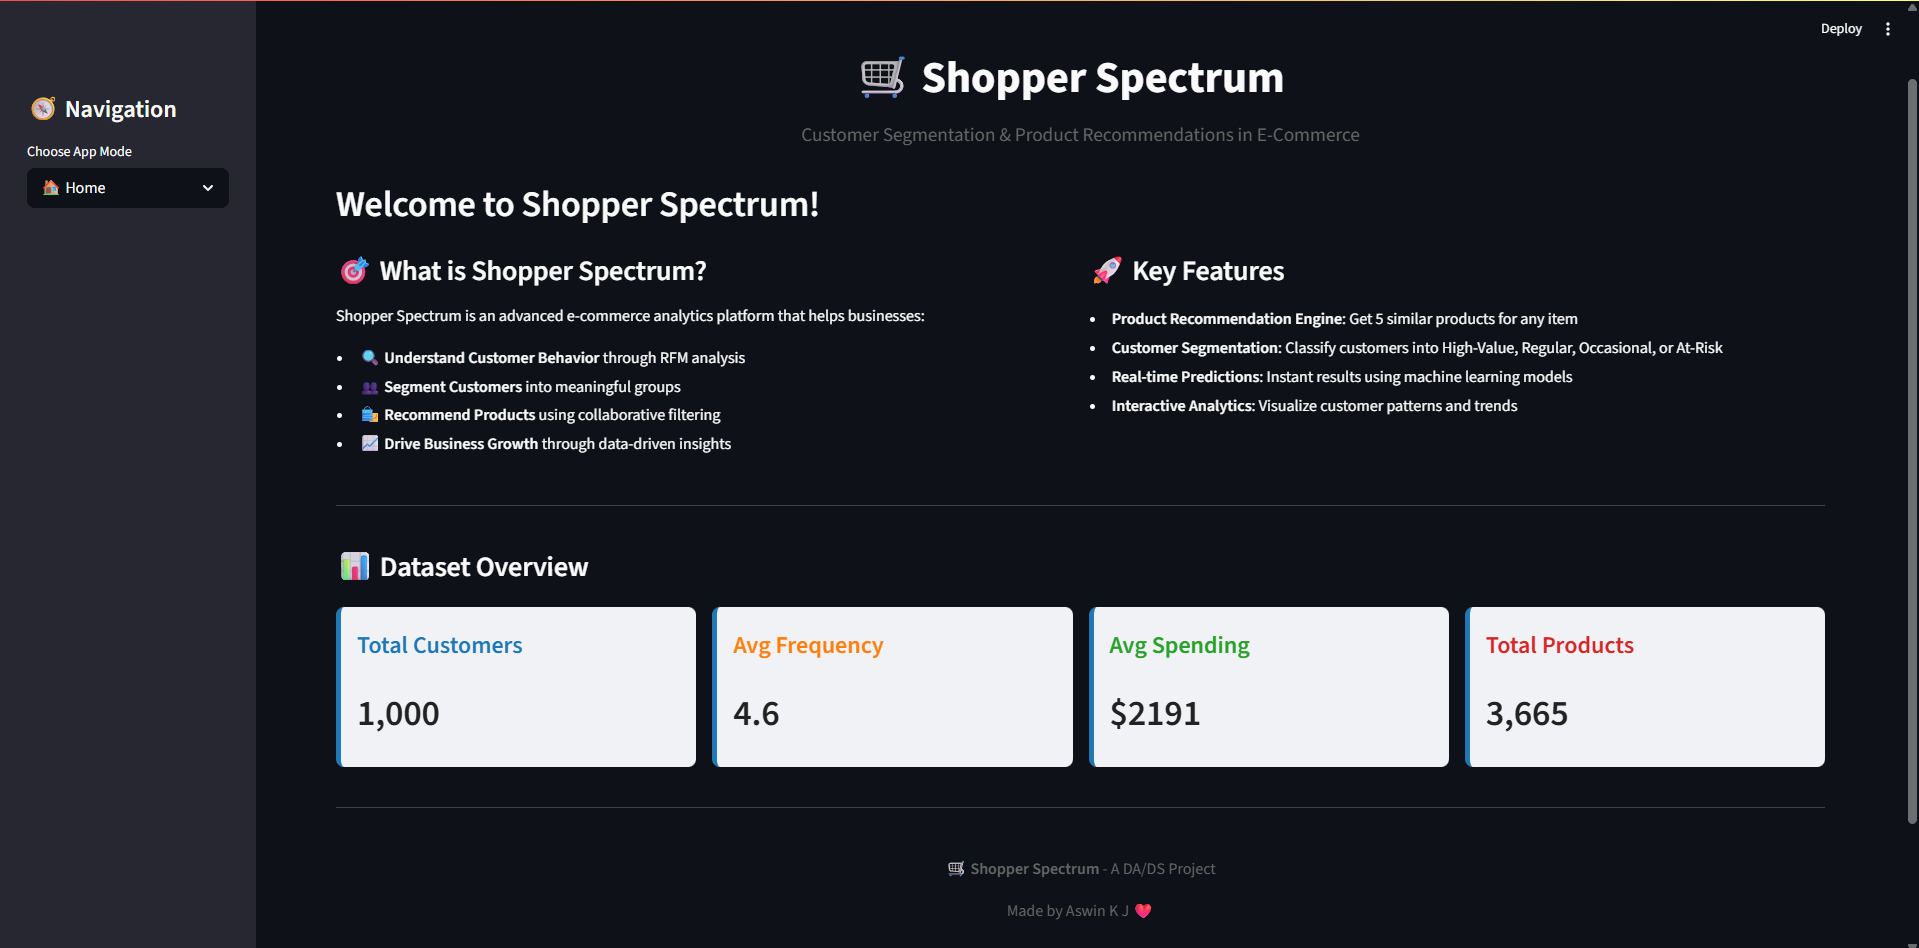



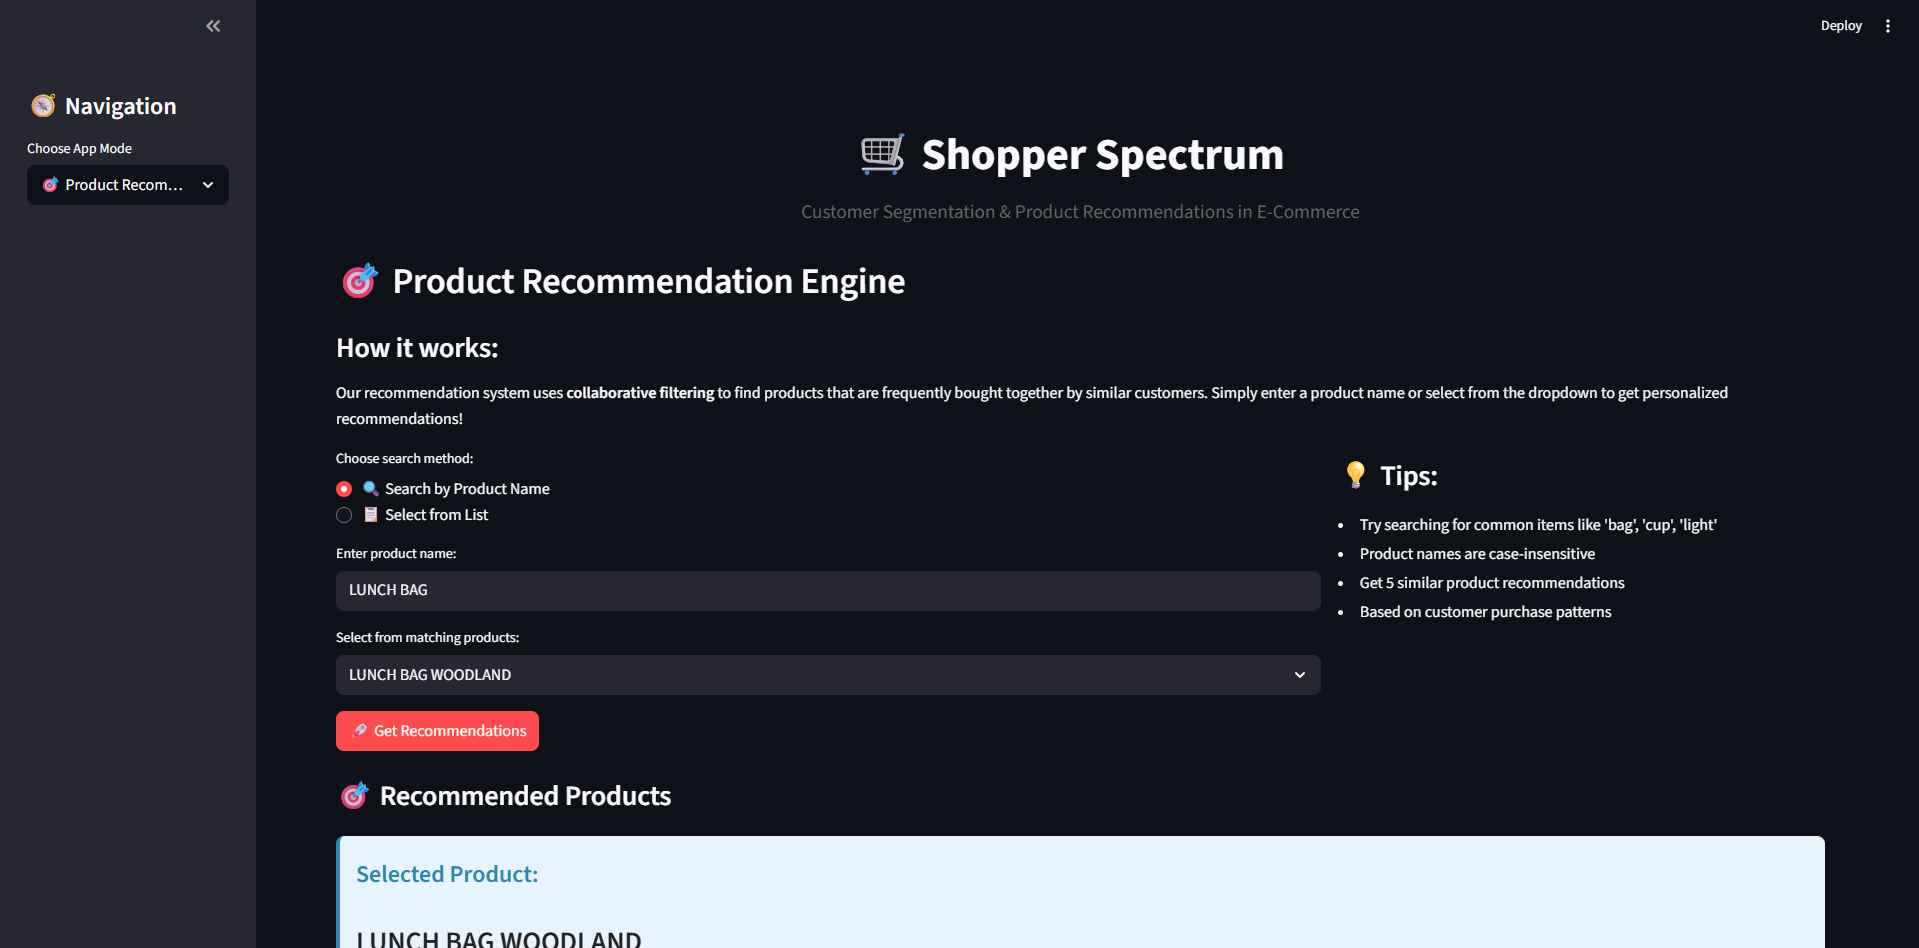

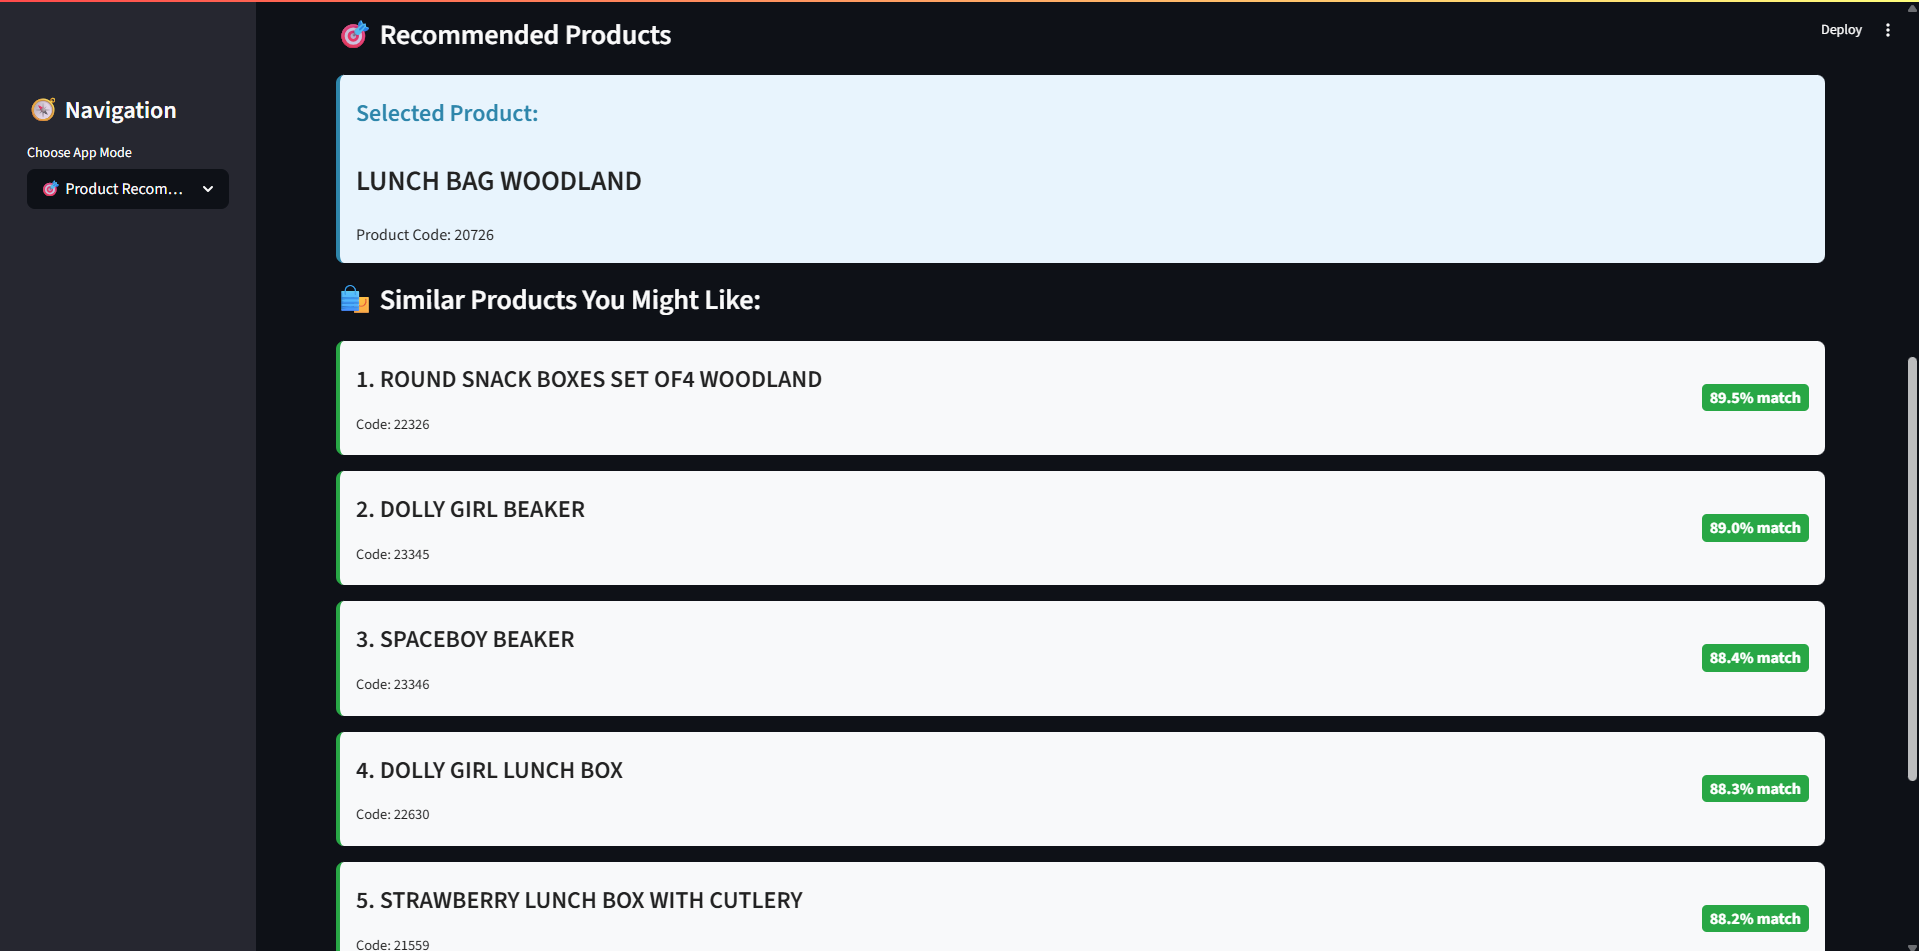

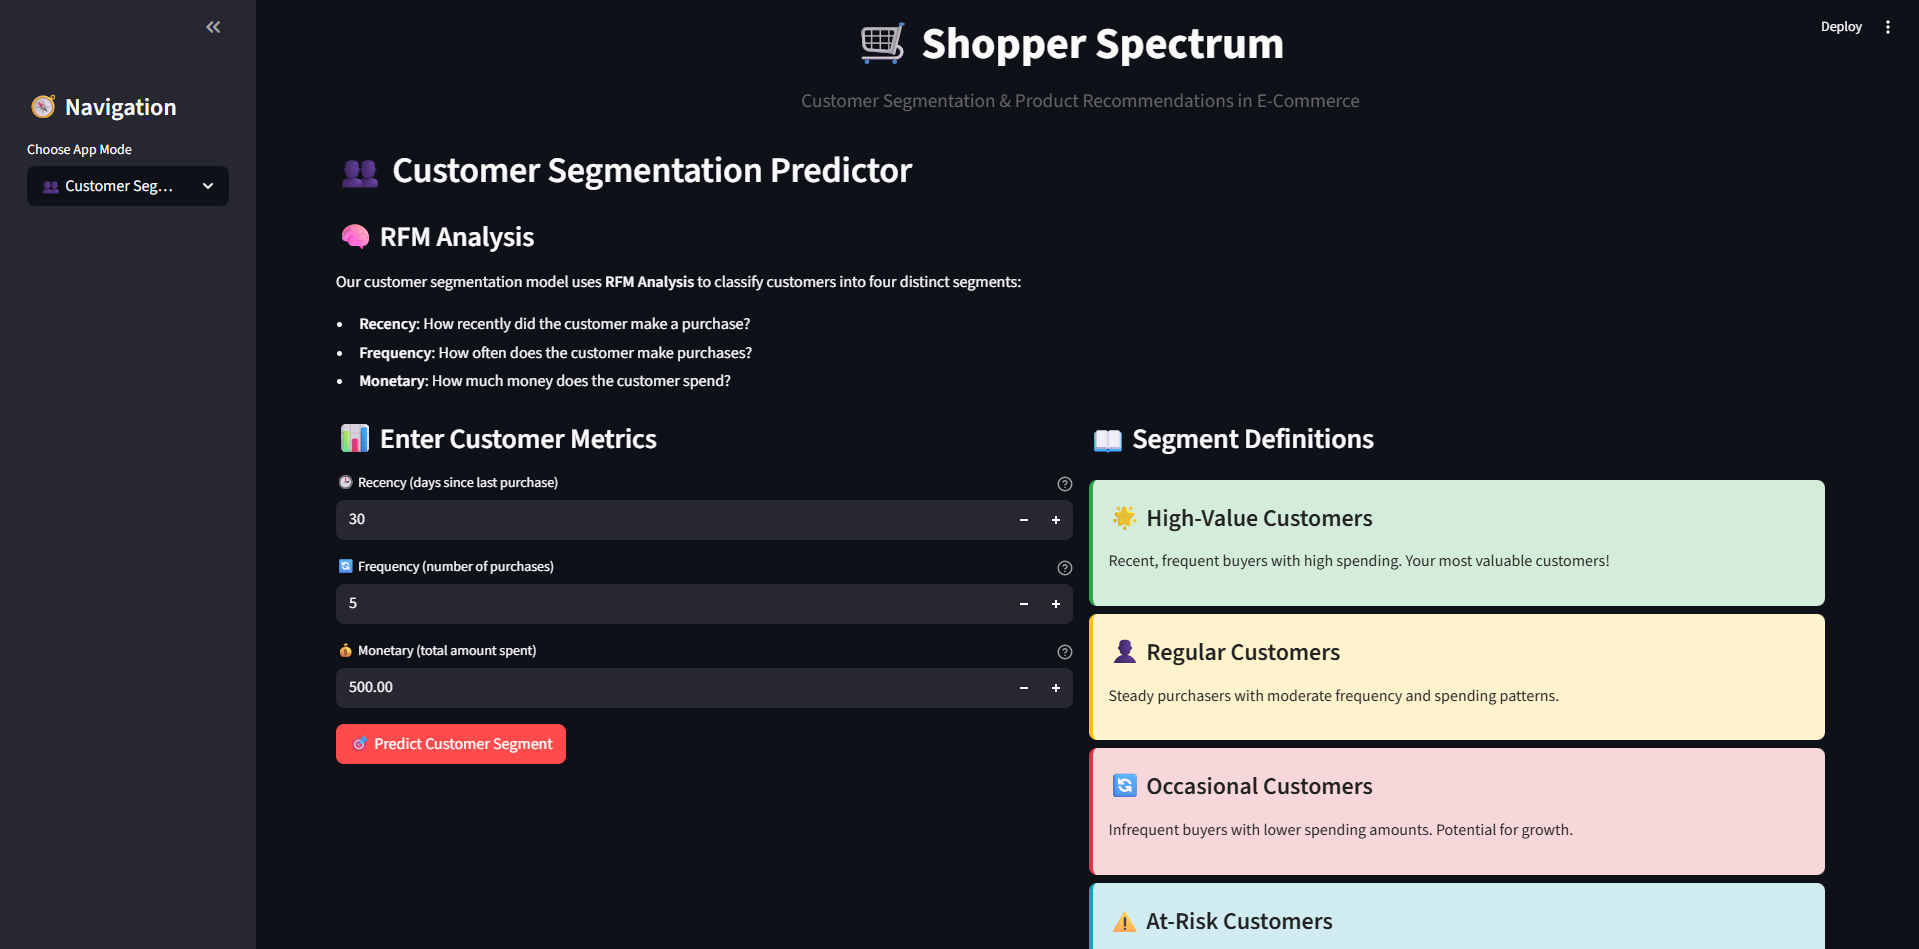

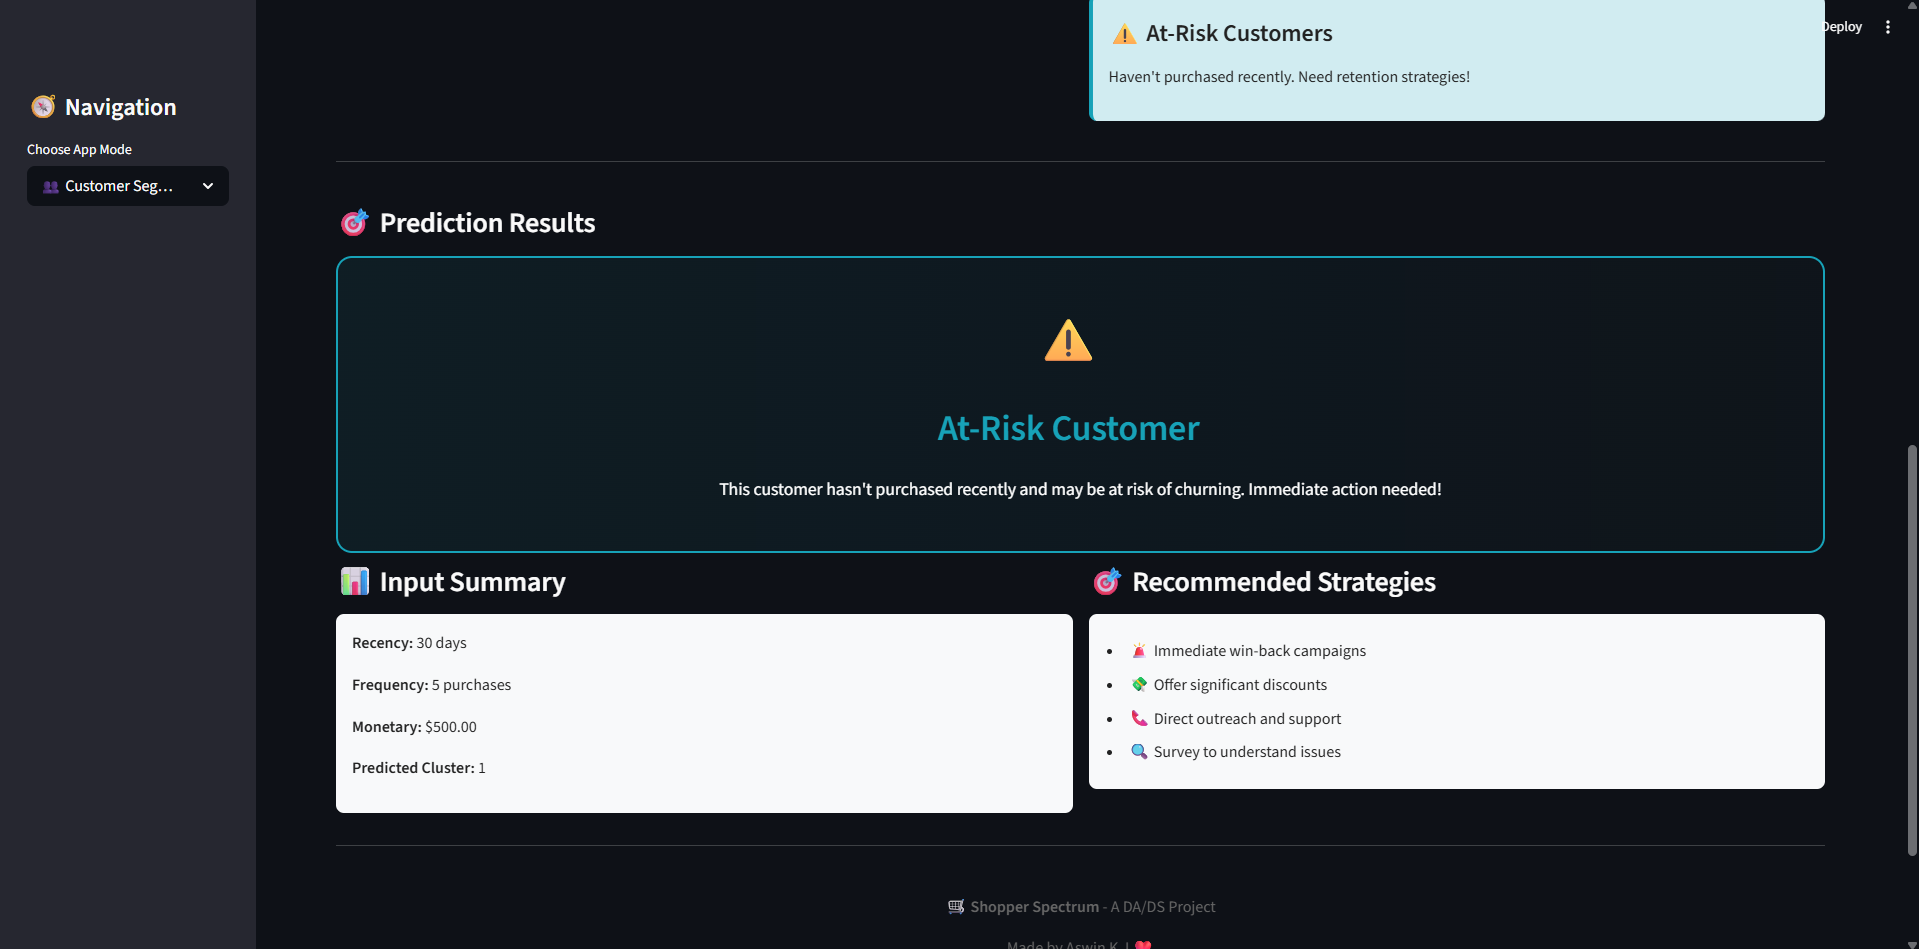

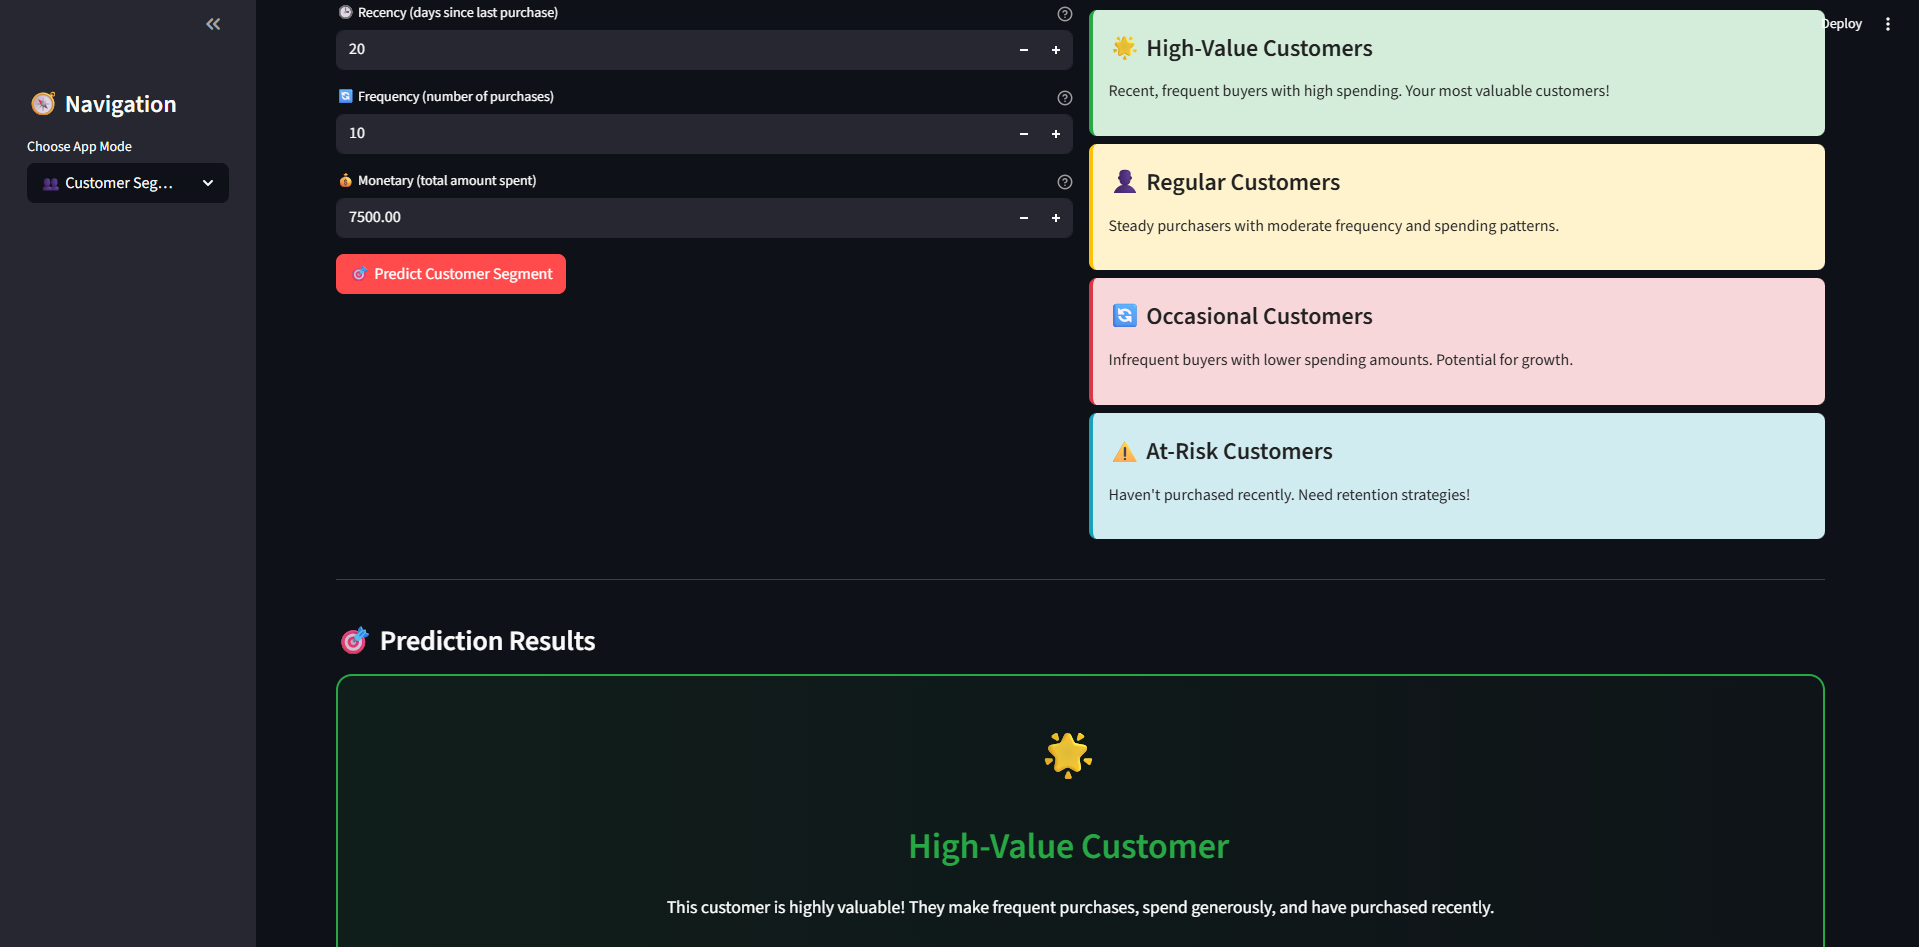

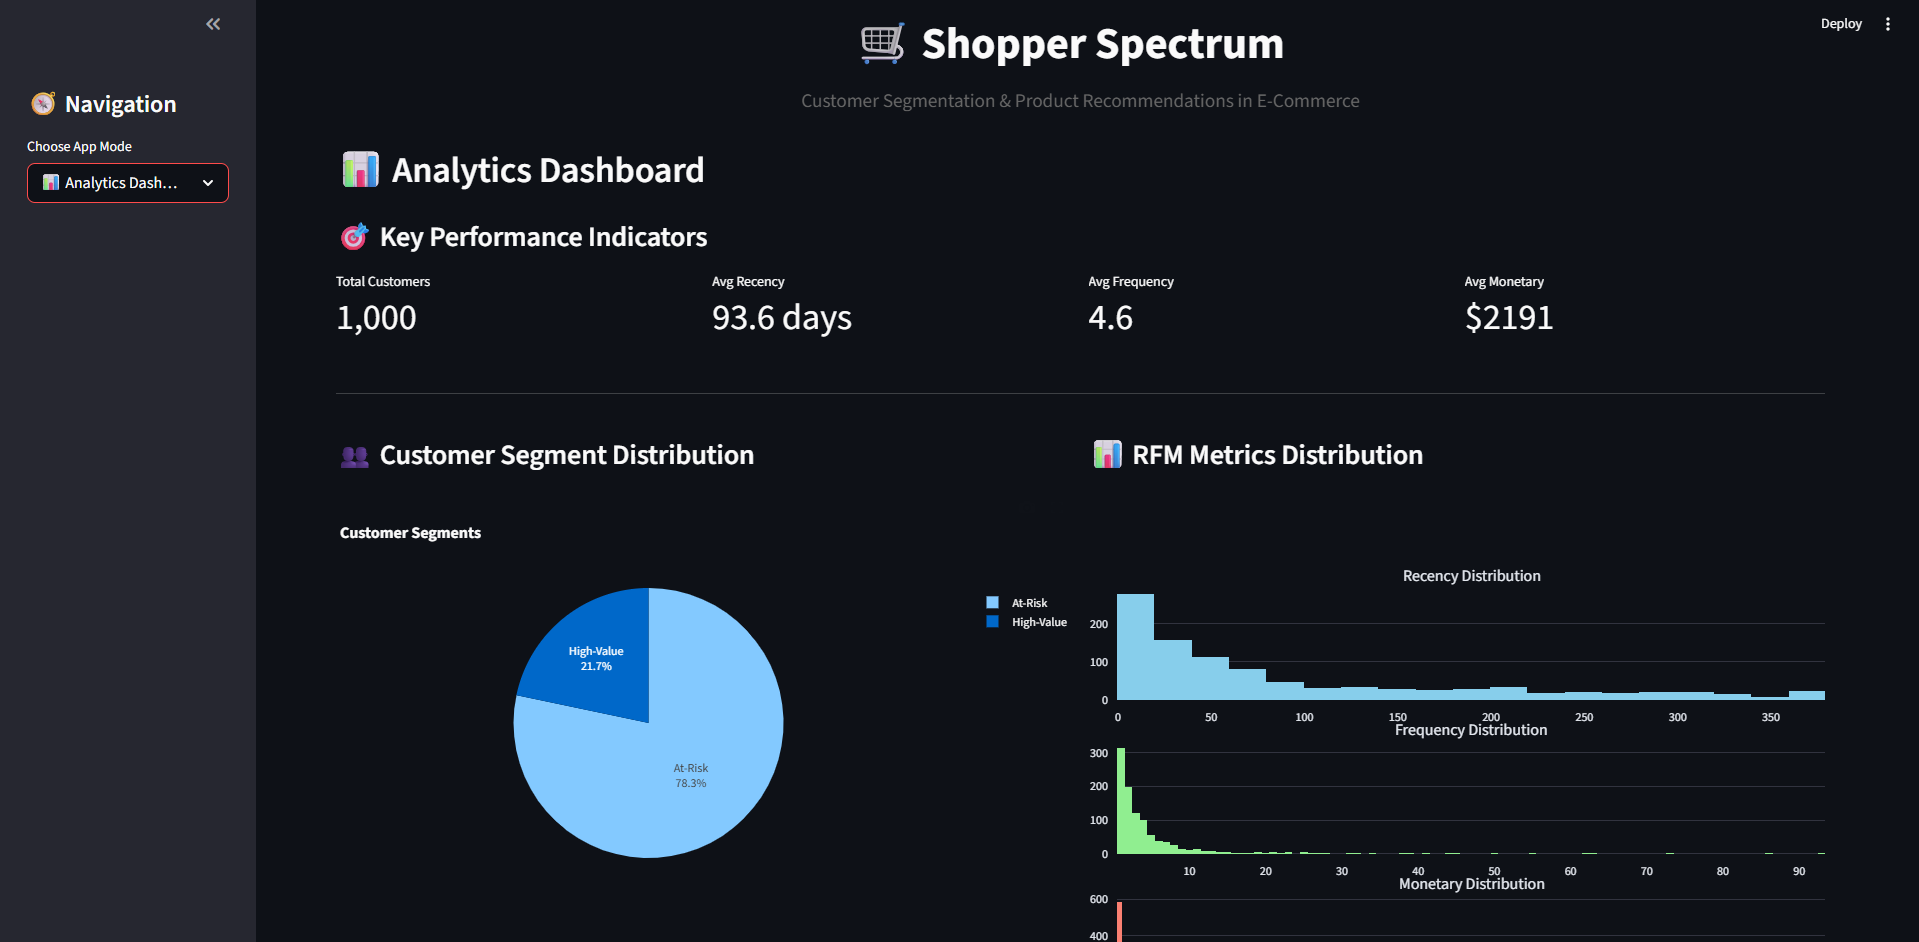

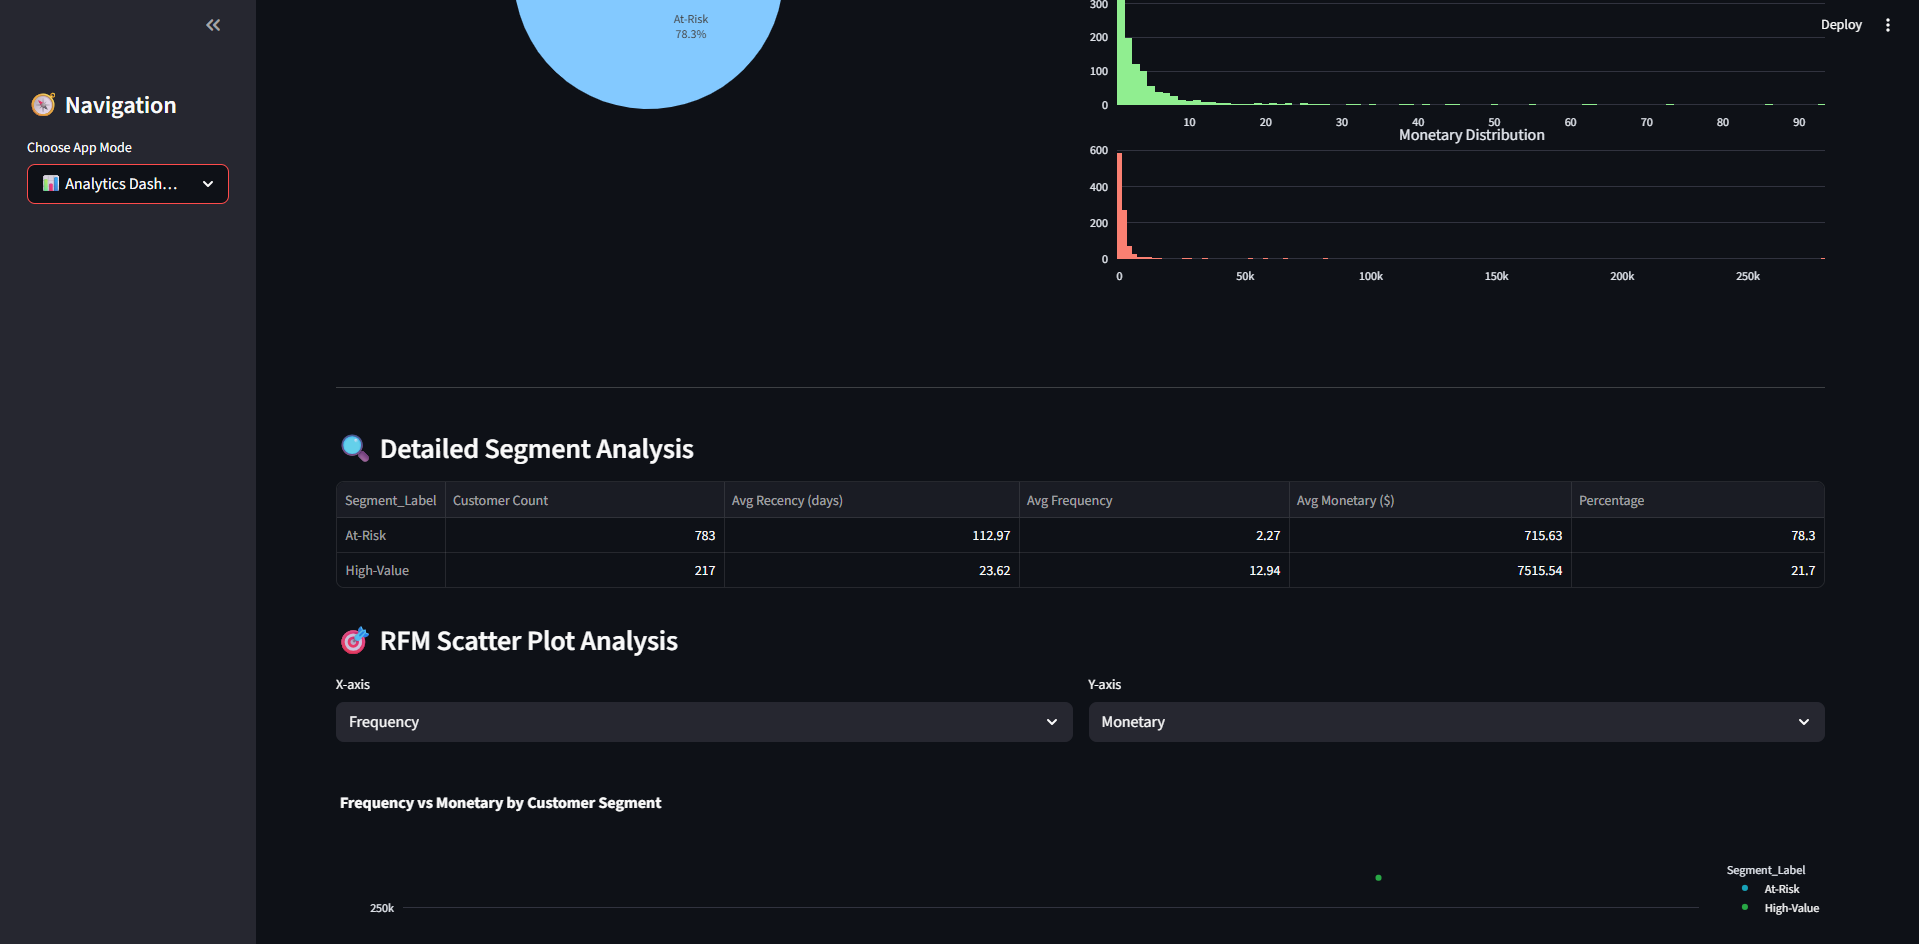

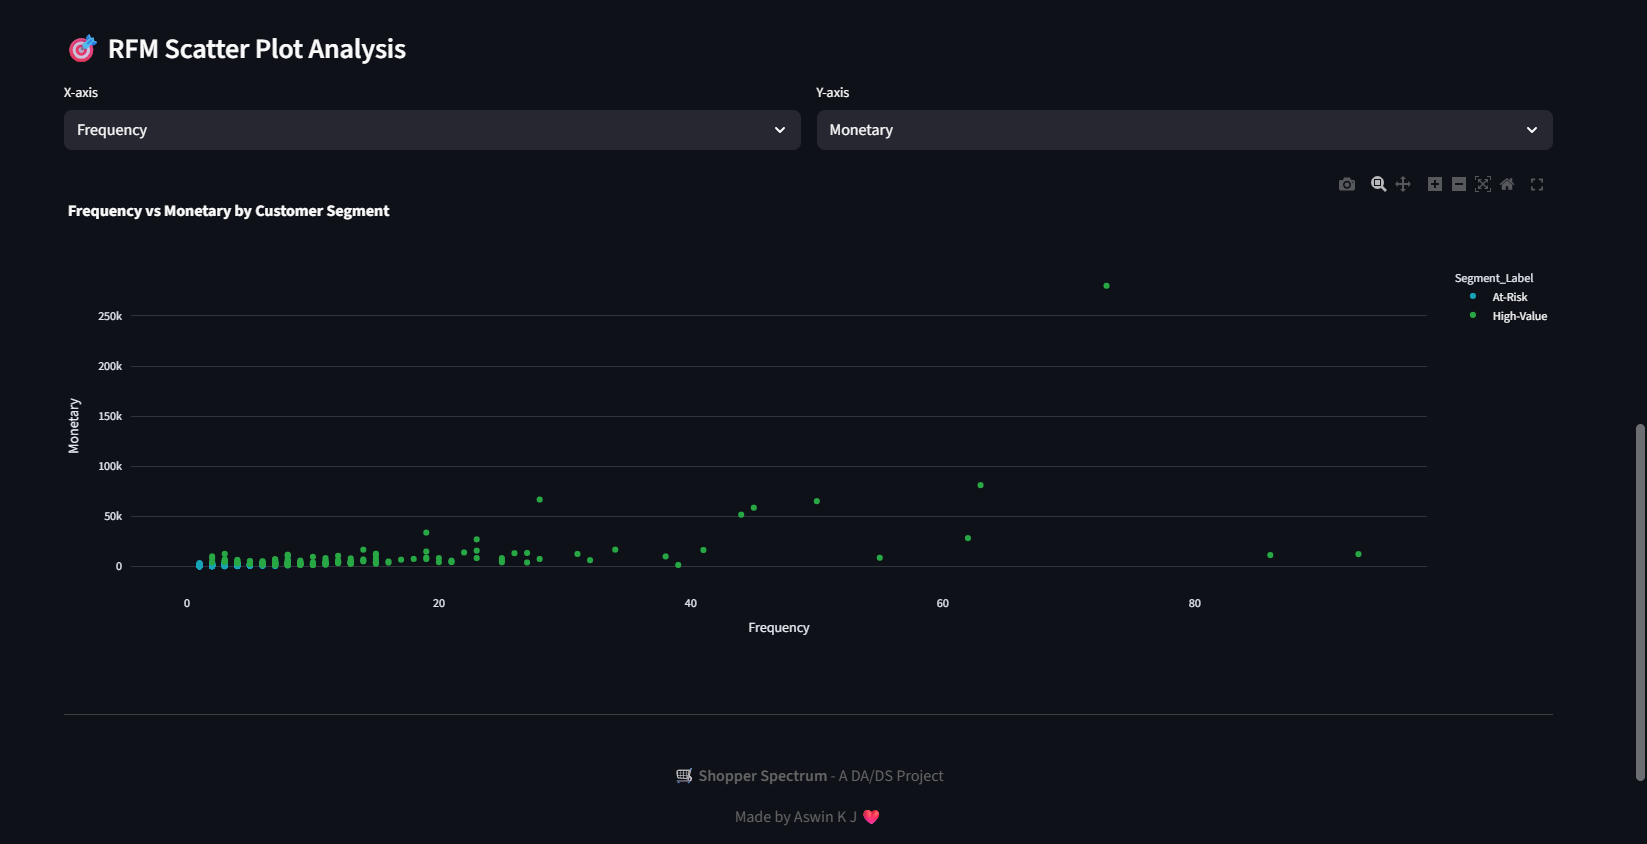

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

I have a created a Shopper Spectrum project and successfully analyzed e‑commerce transaction data to uncover meaningful customer insights. I have cleaned and wrangled the given data and then by applying RFM analysis we have segmented customers into two groups which are

*   High-Value
*   At-Risk

and enabling targeted marketing and retention strategies. We also developed a collaborative filtering recommendation system that provides personalized product suggestions, enhancing customer experience. Finally, I have deployed an interactive Streamlit application which is built to combine segmentation, recommendations, and analytics in real time. Together, these outcomes empower businesses to make data‑driven decisions, improve customer engagement, and drive revenue growth.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***